
## Projeto Lighthouse Ciência de dados

## Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis
temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória
dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

## Objetivo

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação
que mais fazem sentido para o problema.

## Configuração


Bibliotecas Utilizadas

Para este projeto, utilizaremos as seguintes bibliotecas:

- **catboost:** Algoritmo de boosting, variáveis categóricas.
- **collections:** Estruturas de dados.
- **lightgbm:**aprendizado de máquina.
- **matplotlib:** Criação de gráficos.
- **numpy:** Operações matemáticas.
- **pandas:** Gerenciar os dados.
- **pickle:** Serialização e desserialização de objetos.
- **plotly:** Ferramentas visualização de dados.
- **re:** Manipulação de expressões regulares.
- **scikit-learn:** 
  - **sklearn.cluster:** Algoritmos de agrupamento.
  - **sklearn.ensemble:** Algoritmos de ensemble.
  - **sklearn.linear_model:** Modelos lineares.
  - **sklearn.metrics:** Medidas de performance dos modelos.
  - **sklearn.model_selection:** Métodos de validação cruzada e busca de hiperparâmetros.
  - **sklearn.neighbors:** Algoritmos de vizinhança.
  - **sklearn.preprocessing:** Técnicas de pré-processamento de dados.
- **scipy:** 
  - **scipy.stats:** Funções estatísticas.
- **seaborn:** Gráficos estatísticos baseados no matplotlib.
- **statsmodels:** Estimativas estatísticas, testes e modelos para dados.
- **wordcloud:** Geração de nuvens de palavras.
- **xgboost:** Árvores de decisão reforçadas.<br>

Caso não possua alguma das bibliotecas instalada em sua maquina, basta abrir um novo terminal e executar a instalação através do comando "pip install nome-biblioteca".
Exemplo: pip install pandas

In [1]:
# importando bibliotecas necessárias
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
import statsmodels.api as sm
import pickle
import xgboost as xgb
from catboost import CatBoostRegressor
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import BallTree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy.stats import pearsonr, randint
from wordcloud import WordCloud

## Índice

1. [Aquisição de Dados](#aquisicao-de-dados)
2. [Limpeza para Análise](#limpeza-para-analise)
3. [Análise Exploratória de Dados (EDA)](#analise-exploratoria-de-dados-eda)
4. [Pré-processamento e treinamento de ML](#pre-processamento-treinamento)


---


## Aquisição de Dados
<a id="#aquisicao-de-dados"></a>

<p>
<b>Dados do suposto concorrente do cliente final, fornecidos pela Indicium (dataset).</b> <br>
<ul>
    <li>Fonte de dados: <a href="https://drive.google.com/drive/folders/1osZizjZ-hd0SMD5J6-vUZvB8bMJI3zVV" target="_blank">https://drive.google.com/drive/folders/1osZizjZ-hd0SMD5J6-vUZvB8bMJI3zVV</a></li>
    <li>tipo de dados: csv</li>
    <li>Licença: A licença para este conjunto de dados não é especificada</li>
</ul>
<b>Localização das escolas públicas de NY.</b> <br>
<ul>
    <li>Fonte de dados: <a href="https://data.cityofnewyork.us/Education/NYC-DOE-Public-School-Location-Information/3bkj-34v2/about_data" target="_blank">https://data.cityofnewyork.us/Education/NYC-DOE-Public-School-Location-Information/3bkj-34v2/about_data</a></li>
    <li>tipo de dados: csv</li>
    <li>Licença: A licença para este conjunto de dados não é especificada</li>
</ul>
<b>Localização centros públicos computacionais.</b><br>
(centros públicos com computador e internet) <br>
<ul>
    <li>Fonte de dados: <a href="https://data.cityofnewyork.us/Social-Services/Citywide-Public-Computer-Centers/sejx-2gn3/about_data" target="_blank">https://data.cityofnewyork.us/Social-Services/Citywide-Public-Computer-Centers/sejx-2gn3/about_data</a></li>
    <li>tipo de dados: csv</li>
    <li>Licença: A licença para este conjunto de dados não é especificada</li>
</ul>
<b>Resumo de venda de imóveis por bairro</b><br>
<ul>
    <li>Fonte de dados: <a href="https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7/about_data" target="_blank">https://data.cityofnewyork.us/City-Government/DOF-Summary-of-Neighborhood-Sales-by-Neighborhood-/5ebm-myj7/about_data</a></li>
    <li>tipo de dados: csv</li>
    <li>Licença: A licença para este conjunto de dados não é especificada</li>
</ul>
</p>

In [2]:
#armazenar link em uma variavel
filedataset = "https://drive.google.com/uc?export=download&id=1e1nrIDl-_9YwQNZwbCpWlqylotFlTpya"
filenys = "https://data.cityofnewyork.us/api/views/3bkj-34v2/files/56813139-9b9d-44fb-b81d-068553b7a9b7?download=true&filename=LCGMS_SchoolData(additional%20geocoded%20fields%20added).csv"
filepcc = "https://data.cityofnewyork.us/api/views/sejx-2gn3/files/7c95e402-4af1-4a9a-a766-bc375b6ceabf?download=true&filename=Citywide_Public_Computer_Centers_CY2023.csv"
filevib = "https://drive.google.com/uc?export=download&id=1GDt6kYCqiFYnRyfidgAuvdhqXW5MG9wq"

#primeira leitura dos dados e armazenamento da variavel
dataset = pd.read_csv(filedataset)

#devido uma incopatibilidade de codificação nos arquivo CSV externos, teve que ser aplicado ecoding nele
nys = pd.read_csv(filenys, encoding='ISO-8859-1')
pcc = pd.read_csv(filepcc, encoding='ISO-8859-1')
vib = pd.read_csv(filevib, encoding='ISO-8859-1')

#testar a leitura do arquivo e armazenamneto da variavel apenas nas 5 primeiras linhas
print ()
dataset.head(5)


id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

In [3]:
#testar a leitura do arquivo e armazenamneto da variavel apenas nas 5 primeiras linhas
print ()
nys.head(5)

ATS System Code Location Code  \
0             NaN          O001   
1             NaN          OAQK   
2             NaN          OAWF   
3          01M015          M015   
4          01M019          M019   

                                       Location Name   BEDS Number  \
0                               Amani Charter School  6.610000e+11   
1  Victory Schools, DBA The Charter School of Exc...  6.620000e+11   
2                         The Academy Charter School  8.000000e+11   
3                          P.S. 015 Roberto Clemente  3.100000e+11   
4                                P.S. 019 Asher Levy  3.100000e+11   

  Managed By Name Location Type Description Location Category Description  \
0         Charter          General Academic              Secondary School   
1         Charter          General Academic                    Elementary   
2         Charter          General Academic                    Elementary   
3             DOE          General Academic                    Elementary   
4             DOE          General Academic                    Elementary   

                    Grades          Grades Final    Open Date  ...  \
0                    05,06                   NaN  Dec 12 2012  ...   
1           0K,01,02,03,04                   NaN  Mar 20 2006  ...   
2        0K,01,02,03,04,05                   NaN  Jul  1 2009  ...   
3  PK,0K,01,02,03,04,05,SE  PK,0K,01,02,03,04,05  Jul  1 1904  ...   
4  PK,0K,01,02,03,04,05,SE  PK,0K,01,02,03,04,05  Jul  1 1956  ...   

  BFSC Director Name     BFSC Director Title BFSC Director Phone  \
0                NaN                     NaN                 NaN   
1                NaN                     NaN                 NaN   
2                NaN                     NaN                 NaN   
3          CHU, YUET  FSC Executive Director        646-470-0721   
4          CHU, YUET  FSC Executive Director        646-470-0721   

  HighSchool Network Location Code HighSchool Network Name  \
0                              NaN                     NaN   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   

   HighSchool Network Superintendent    Borough      BIN   Latitude  Longitude  
0                                NaN        NaN      NaN        NaN        NaN  
1                                NaN        NaN      NaN        NaN        NaN  
2                                NaN        NaN      NaN        NaN        NaN  
3                                NaN  MANHATTAN           40.721807 -73.979022  
4                                NaN  MANHATTAN           40.729636 -73.983818  

[5 rows x 44 columns]

In [4]:
#testar a leitura do arquivo e armazenamneto da variavel apenas nas 5 primeiras linhas
print ()
pcc.head(5)

ï»¿Calendar Year  Object Identification Number Oversight Agency  \
0              2023                             0              BPL   
1              2023                             1             DFTA   
2              2023                             2             DYCD   
3              2023                             3              BPL   
4              2023                             4             DFTA   

                                   Location Name    Operating Status  \
0                                   ADAMS STREET                Open   
1  RAICES TIMES PLAZA NEIGHBORHOOD SENIOR CENTER  Temporarily closed   
2                                      INGERSOLL                Open   
3                               BROOKLYN HEIGHTS                Open   
4     CCNS ST CHARLES NEIGHBORHOOD SENIOR CENTER                Open   

  Address Number Address Prefix Address Street Address Suffix      City  ...  \
0              9            NaN          Adams         Street  Brooklyn  ...   
1            460            NaN       Atlantic         Avenue  Brooklyn  ...   
2            177            NaN         Myrtle         Street  Brooklyn  ...   
3            109            NaN         Remsen         Street  Brooklyn  ...   
4             55            NaN     Pierrepont         Street  Brooklyn  ...   

  Certifications (ex: in software, in housing, in professional areas, etc.)  \
0                                                 No                          
1                                                NaN                          
2                                                 No                          
3                                                 No                          
4                                                 No                          

  Digital Literacy   Latitude  Longitude Community District Council District  \
0               No  40.704110 -73.988443                302               33   
1              NaN  40.686198 -73.982959                302               33   
2               No  40.693787 -73.982041                302               35   
3              Yes  40.695683 -73.991348                302               33   
4               No  40.695783 -73.995117                302               33   

         BIN           BBL Census Tract (2020)  \
0  3329396.0  3.000180e+09                2100   
1  3000937.0  3.001840e+09                4100   
2        NaN           NaN                1501   
3  3002076.0  3.002490e+09                 502   
4  3001825.0  3.002368e+09                 501   

  Neighborhood Tabulation Area (NTA) (2020)  
0                                    BK0202  
1                                    BK0202  
2                                    BK0202  
3                                    BK0201  
4                                    BK0201  

[5 rows x 34 columns]

In [5]:
#testar a leitura do arquivo e armazenamneto da variavel apenas nas 5 primeiras linhas
print ()
vib.head(5)

BOROUGH   NEIGHBORHOOD           TYPE OF HOME  NUMBER OF SALES  \
0  MANHATTAN  ALPHABET CITY    01 ONE FAMILY HOMES                1   
1  MANHATTAN  ALPHABET CITY    02 TWO FAMILY HOMES                1   
2  MANHATTAN  ALPHABET CITY  03 THREE FAMILY HOMES                1   
3  MANHATTAN        CHELSEA    01 ONE FAMILY HOMES                2   
4  MANHATTAN        CHELSEA    02 TWO FAMILY HOMES                2   

   LOWEST SALE PRICE  AVERAGE SALE PRICE  MEDIAN SALE PRICE  \
0             593362              593362             593362   
1            1320000             1320000            1320000   
2             900000              900000             900000   
3             500000             2875000            2875000   
4            1306213             2603107            2603107   

   HIGHEST SALE PRICE  YEAR  
0              593362  2010  
1             1320000  2010  
2              900000  2010  
3             5250000  2010  
4             3900000  2010

## Limpeza para Análise
<a id="#limpeza-para-analise"></a>

<p>
Análise das tabelas de dados, identificação de células vazias, colunas irrelevantes para o projeto, etc. <br>
</p>

In [6]:
#visualizar informação resumida do conjuto do dados
print(dataset.info())
print(nys.info())
print(pcc.info())
print(vib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

<b>Tratamento da Dataset:</b>

Algumas colunas são irrelevantes ao preço do aluguel, pois existem apenas para um controle interno do servidor de dados. 

<ul>
    <li>Exclusão das colunas: id, host_id, host_name, ultima_review.</li>
    <li>Exclusão de linhas: Remover as linhas vazias.</li>
</ul>

<b>Observações</b>
<ul>
    <li>A coluna "nome" será mantida a pedido do cliente que deseja saber: "Existe algum padrão no texto do nome do local para lugares de mais alto valor?"</li>
    <li>As colunas: disponibilidade_365, calculado_host_listings_count, numero_de_reviews, por mais que se mostrem pouco relevantes, serão mantidas por serem do tipo Inteiros e não terem linhas vazias, podem auxiliar na fase de aprendizagem, e poderão nos mostrar algo nos graficos futuros, do contrario serão removidas em proximo ciclo. </li>
    <li>A coluna "reviews_por_mes" foi realizada uma analise separada, pois tem 1052 linhas vazias, que após uma analize das 50 primeiras linhas vazias, mostrou que excluir essas linhas para manter essa coluna é inviavél. Para manter essa coluna temos que utilizar de imputação de valores: Com Mediana(0.72) ou Clusters com KNN, porém após avaliar os outliers, teria que ser aplicado limittação(capping) ou transformação para tratamento. Em resumo 1/4 dos dados dessa coluna perderia a confiabilidade, ela não é uma coluna que valha tamanho risco na credibilidade futura, decisão final exclusão da coluna.</li>
    <li> Após utilizar a coluna prices em alguns graficos mais a frente, identificado Outliers, devido a inscosistencia nas analises futuras e a quantidade ser abaixo de 10%, optei por remover as linhas e não transformalas.
</ul>

<b>Análise da coluna reviews_por_mes</b>

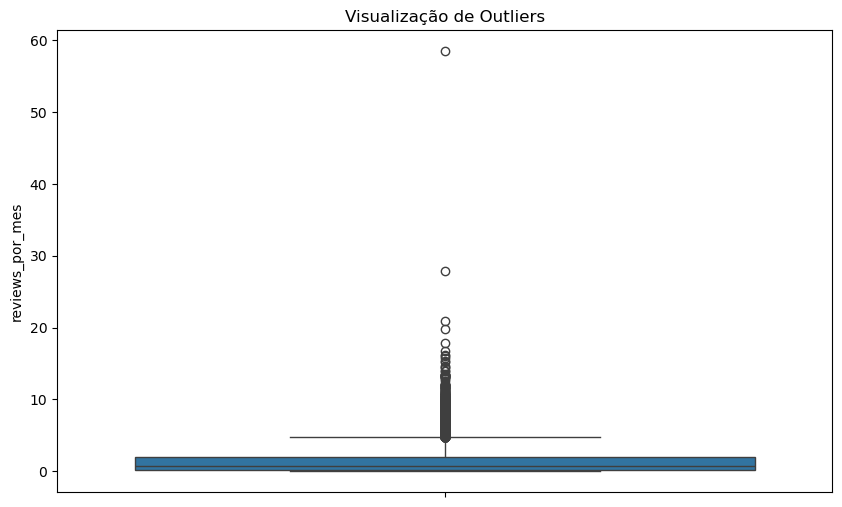

In [7]:
# Criar um boxplot para visualizar outliers da coluna 'reviews_por_mes'
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, y='reviews_por_mes')
plt.title('Visualização de Outliers')
plt.show()


In [8]:
# Analisar as 50 primeiras linhas com NaN para auxiliar a decidir na remoção da coluna 'reviews_por_mes'
ds_nan = dataset[dataset['reviews_por_mes'].isna()]
#coloquei como comentario a linha de baixo para não mostrar novamente as linhas, já tomei a decisão, mantive a linha para fins acadêmicos
#ds_nan.head(50)


<b>Análise de quantas linhas serão perdidas, se removidos os Outliers da coluna Preços </b><br>

In [9]:
# Calcular os quartis e o IQR
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Quantificar as linhas que seriam removidas
outliers = dataset[(dataset['price'] < limite_inferior) | (dataset['price'] > limite_superior)]
num_outliers = len(outliers)

# Quantificar as linhas restantes
linhas_restantes = len(dataset) - num_outliers

print(f"Número de registros originais: {len(dataset)}")
print(f"Número de outliers identificados: {num_outliers}")
print(f"Número de registros após remoção dos outliers: {linhas_restantes}")


Número de registros originais: 48894
Número de outliers identificados: 2972
Número de registros após remoção dos outliers: 45922


<b>Removendo os Outliers da coluna Preço </b>


In [10]:
# Calcular os quartis e o IQR
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers
dataset_sem_outliers = dataset[(dataset['price'] >= limite_inferior) & (dataset['price'] <= limite_superior)]

print(f"Dados originais: {len(dataset)} registros")
print(f"Dados sem outliers: {len(dataset_sem_outliers)} registros")


Dados originais: 48894 registros
Dados sem outliers: 45922 registros


<b>Remoção de colunas e linhas </b>


In [11]:
# removendo colunas
dataset = dataset.drop(columns=["id", "host_id", "host_name", "ultima_review","reviews_por_mes"])

# removendo linhas vazias
dataset = dataset.dropna()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48878 entries, 0 to 48893
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nome                           48878 non-null  object 
 1   bairro_group                   48878 non-null  object 
 2   bairro                         48878 non-null  object 
 3   latitude                       48878 non-null  float64
 4   longitude                      48878 non-null  float64
 5   room_type                      48878 non-null  object 
 6   price                          48878 non-null  int64  
 7   minimo_noites                  48878 non-null  int64  
 8   numero_de_reviews              48878 non-null  int64  
 9   calculado_host_listings_count  48878 non-null  int64  
 10  disponibilidade_365            48878 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.5+ MB
None


In [12]:
#Verificar a descrição estatística do conjuto de dados
print(dataset.describe(include='all'))

                  nome bairro_group        bairro      latitude     longitude  \
count            48878        48878         48878  48878.000000  48878.000000   
unique           47904            5           221           NaN           NaN   
top     Hillside Hotel    Manhattan  Williamsburg           NaN           NaN   
freq                18        21652          3918           NaN           NaN   
mean               NaN          NaN           NaN     40.728946    -73.952168   
std                NaN          NaN           NaN      0.054528      0.046160   
min                NaN          NaN           NaN     40.499790    -74.244420   
25%                NaN          NaN           NaN     40.690090    -73.983070   
50%                NaN          NaN           NaN     40.723080    -73.955680   
75%                NaN          NaN           NaN     40.763110    -73.936280   
max                NaN          NaN           NaN     40.913060    -73.712990   

              room_type    

<b>Tratamento da base escolas de NY:</b>

A base com a localização das escolas servirá de análise para identificar se tem ou não relevância escolas pertos do imóvel no preço do aluguel.

<ul>
    <li>Exclusão de colunas: remoção de todas as colunas exceto: Longitude, Latitude.</li>
    <li>Exclusão de linhas: Remover as linhas que não tem a localização da escola.</li>
</ul>


In [13]:
# removendo colunas
colunas_manter_nys = ["Latitude", "Longitude"]
nys = nys[colunas_manter_nys]

# removendo linhas vazias
nys = nys.dropna()
print(nys.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1837 entries, 3 to 1842
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   1837 non-null   float64
 1   Longitude  1837 non-null   float64
dtypes: float64(2)
memory usage: 43.1 KB
None


In [14]:
#Verificar a descrição estatística do conjuto de dados
print(nys.describe(include='all'))

          Latitude    Longitude
count  1837.000000  1837.000000
mean     40.736229   -73.919504
std       0.085407     0.079555
min      40.508284   -74.244118
25%      40.672727   -73.961695
50%      40.727892   -73.920840
75%      40.816748   -73.879089
max      40.903553   -73.709137


<b>Tratamento da base centro computacional público:</b>

A base com a localização dos centros servirá de análise para identificar se tem ou não relevância centros computacionais públicos perto do imóvel no preço do aluguel.

<ul>
    <li>Exclusão de colunas: remoção de todas as colunas exceto: Longitude, Latitude.</li>
</ul>


In [15]:
# removendo colunas
colunas_manter_pcc = ["Latitude", "Longitude"]
pcc = pcc[colunas_manter_pcc]

print(pcc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   530 non-null    float64
 1   Longitude  530 non-null    float64
dtypes: float64(2)
memory usage: 8.4 KB
None


In [16]:
#Verificar a descrição estatística do conjuto de dados
print(pcc.describe(include='all'))

         Latitude   Longitude
count  530.000000  530.000000
mean    40.727101  -73.919861
std      0.084727    0.083268
min     40.509531  -74.244107
25%     40.668412  -73.970202
50%     40.721501  -73.930245
75%     40.797627  -73.867765
max     40.905009  -73.714838


<b>Tratamento da base resumo de venda de imóveis por bairro:</b>

A base com o resmudo de venda de imóveis por bairro, será utilizado para analisar e cruzar a informação do valor de venda em média e o valor médio de aluguel daquela bairro.

<ul>
    <li>Exclusão de colunas: remoção de todas as colunas exceto: BOROUGH, NEIGHBORHOOD, TYPE OF HOME, AVERAGE SALE PRICE, YEAR.</li>
    <li>Exclusão de linhas: Mantive apenas as linhas do ano de 2022.
</ul>


In [17]:
# Removendo colunas, mantendo apenas as desejadas
vib = vib.drop(columns=["NUMBER OF SALES", "LOWEST SALE PRICE", "MEDIAN SALE PRICE", "HIGHEST SALE PRICE"])
vib = vib[vib['YEAR'] == 2022]

# Informações do DataFrame
print(vib.info())

# Verificar a descrição estatística do conjunto de dados
print(vib.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 5926 to 7787
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BOROUGH             608 non-null    object
 1   NEIGHBORHOOD        608 non-null    object
 2   TYPE OF HOME        608 non-null    object
 3   AVERAGE SALE PRICE  608 non-null    int64 
 4   YEAR                608 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 28.5+ KB
None
       BOROUGH NEIGHBORHOOD             TYPE OF HOME  AVERAGE SALE PRICE  \
count      608          608                      608        6.080000e+02   
unique       5          232                        3                 NaN   
top          3    SUNNYSIDE  01 ONE FAMILY DWELLINGS                 NaN   
freq       168            5                      226                 NaN   
mean       NaN          NaN                      NaN        1.653466e+06   
std        NaN          NaN                      

## Análise Exploratória de Dados (EDA)
<a id="analise-exploratoria-de-dados-eda"></a>
<p>
Para a análise exploratoria de dados(EDA), pularemos a visualização inicial dos dados, bem como suas estatísticas e limpeza, pois foram realizados em passos anteriores. Iremos direto para as análises com auxílio de gráficos e plots.<br>
</p>

<h3><b>Análise Univariada</b></h3>
Para um entedimento melhor da variavél preço, que ira nortear a base do nosso projeto, uma primeira analise dela soinha.

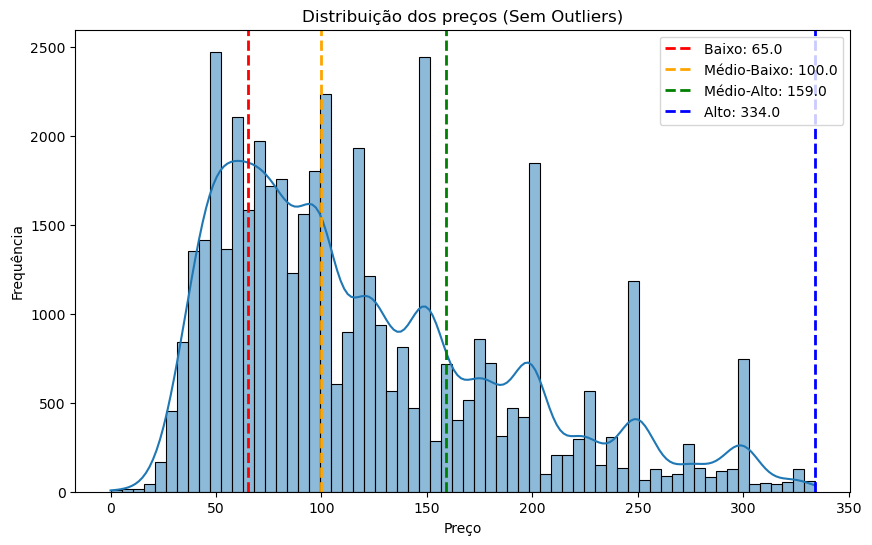

In [18]:
# Dividir os preços em quartis usando .loc para evitar SettingWithCopyWarning
dataset_sem_outliers = dataset_sem_outliers.copy()  # Fazendo uma cópia para evitar avisos
dataset_sem_outliers.loc[:, 'faixa_preco'] = pd.qcut(dataset_sem_outliers['price'], q=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])

# Definir as faixas de preço
faixa_preco_valores = dataset_sem_outliers['price'].quantile([0, 0.25, 0.5, 0.75, 1]).values

# Histograma para preços com faixas
plt.figure(figsize=(10, 6))
sns.histplot(dataset_sem_outliers['price'], kde=True)
plt.axvline(faixa_preco_valores[1], color='r', linestyle='--', linewidth=2, label=f'Baixo: {faixa_preco_valores[1]}')
plt.axvline(faixa_preco_valores[2], color='orange', linestyle='--', linewidth=2, label=f'Médio-Baixo: {faixa_preco_valores[2]}')
plt.axvline(faixa_preco_valores[3], color='g', linestyle='--', linewidth=2, label=f'Médio-Alto: {faixa_preco_valores[3]}')
plt.axvline(faixa_preco_valores[4], color='b', linestyle='--', linewidth=2, label=f'Alto: {faixa_preco_valores[4]}')
plt.title('Distribuição dos preços (Sem Outliers)')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.legend()
plt.show()


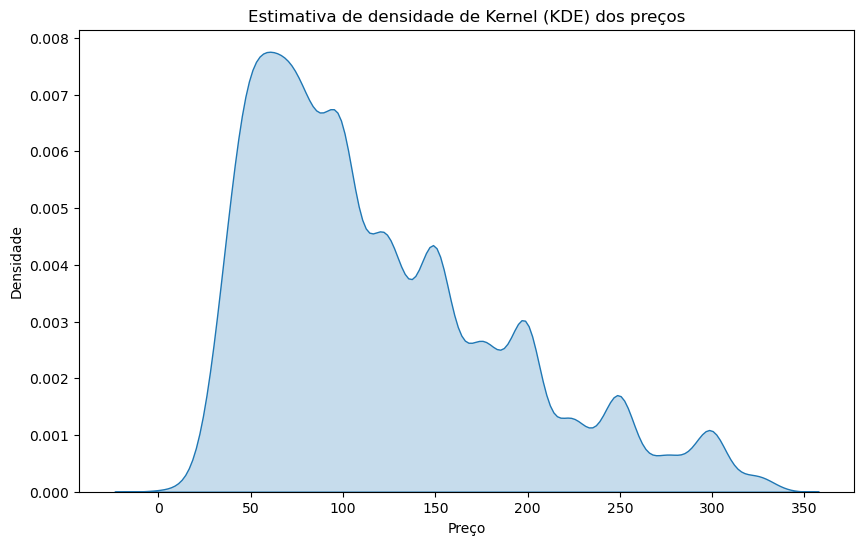

In [19]:
# Gráfico de Densidade atualizado
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset_sem_outliers['price'], fill=True)
plt.title('Estimativa de densidade de Kernel (KDE) dos preços')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()

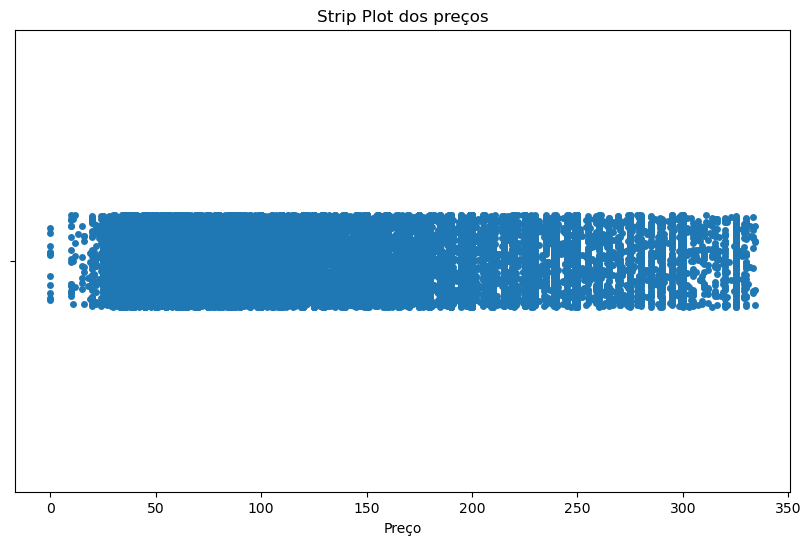

In [20]:
# Strip Plot para preços
plt.figure(figsize=(10, 6))
sns.stripplot(x='price', data=dataset_sem_outliers, jitter=True)
plt.title('Strip Plot dos preços')
plt.xlabel('Preço')
plt.show()

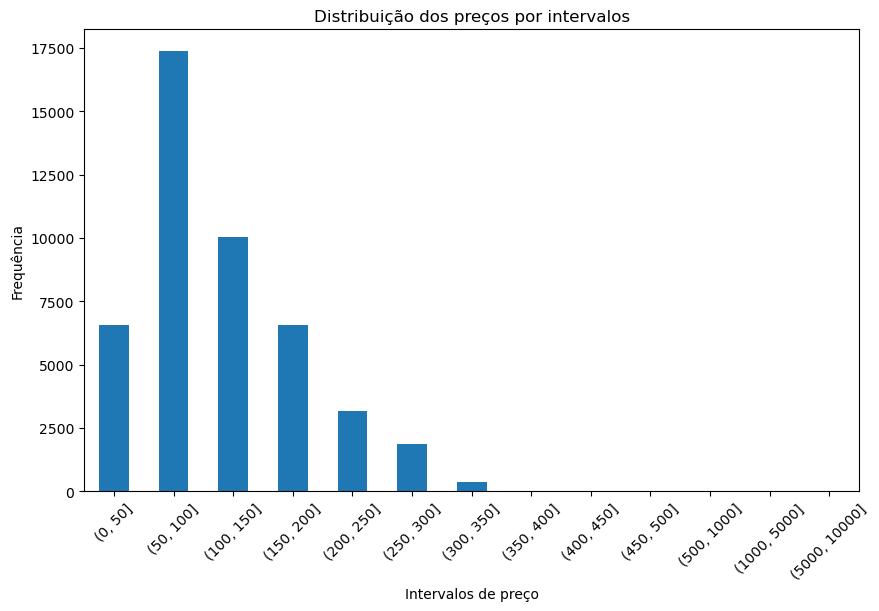

In [21]:
# Criação de intervalos de preços
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 5000, 10000]
dataset_sem_outliers['price_bins'] = pd.cut(dataset_sem_outliers['price'], bins=bins)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
dataset_sem_outliers['price_bins'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição dos preços por intervalos')
plt.xlabel('Intervalos de preço')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

<h3><b>Análise Bivariada</b></h3>
Analise das variavéis object X preço.

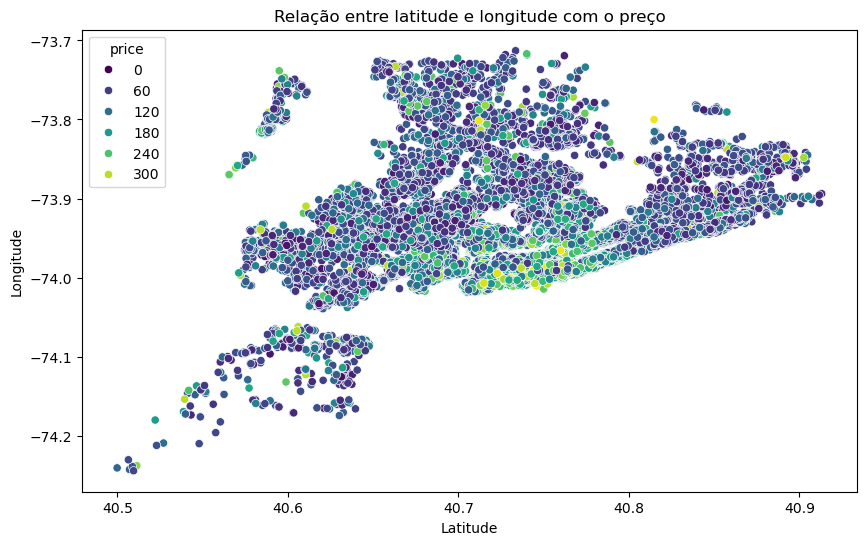

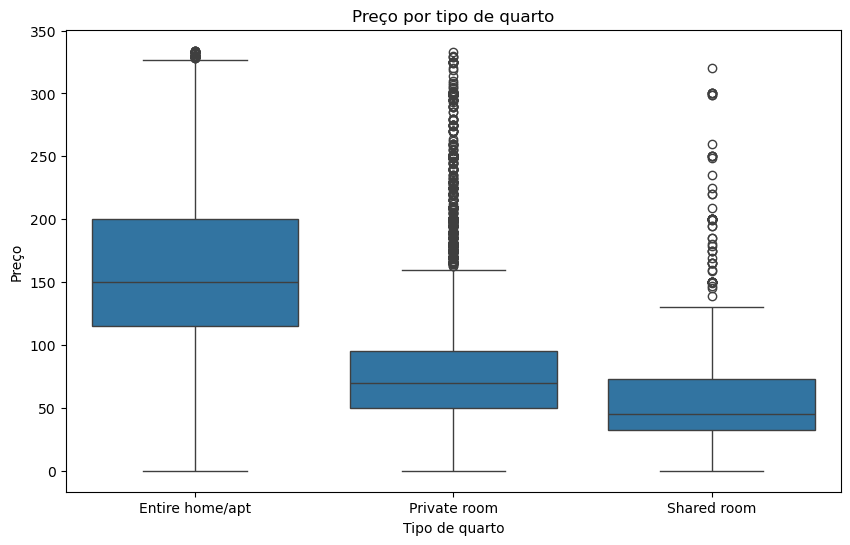

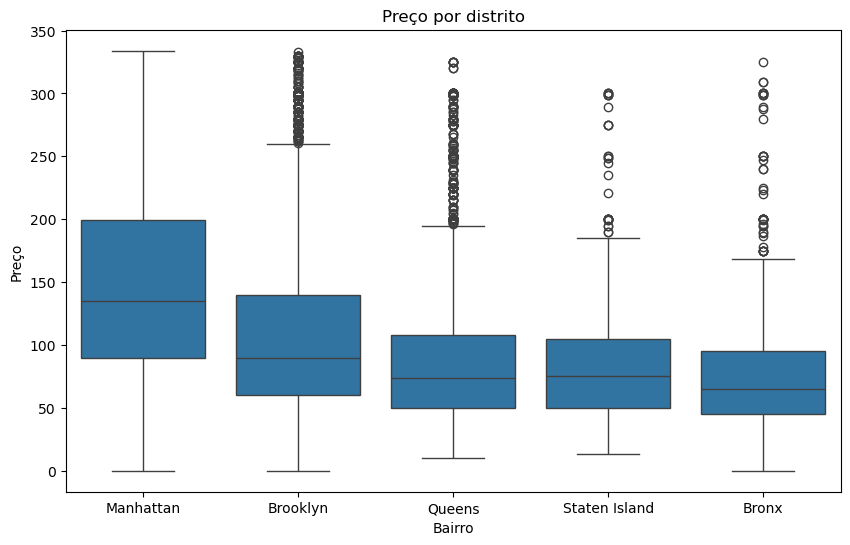

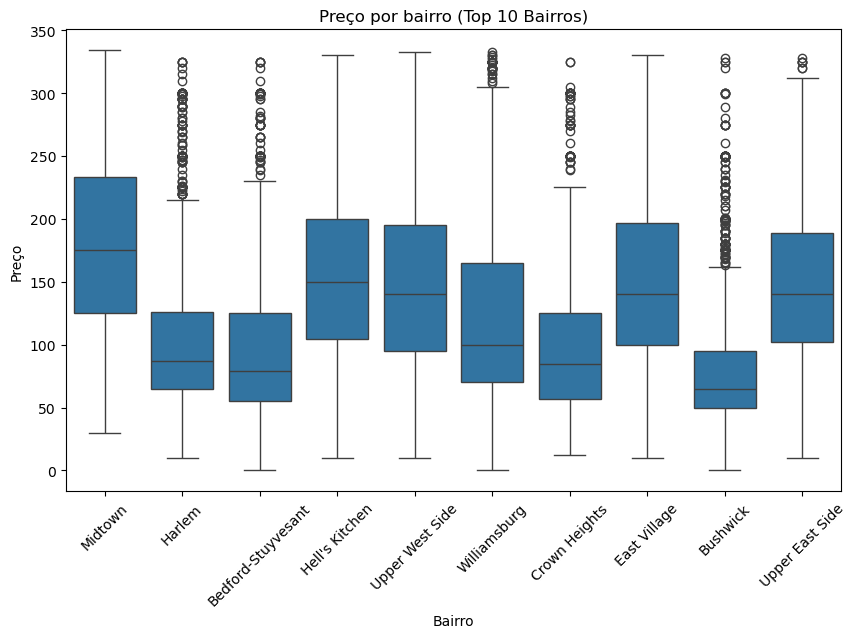

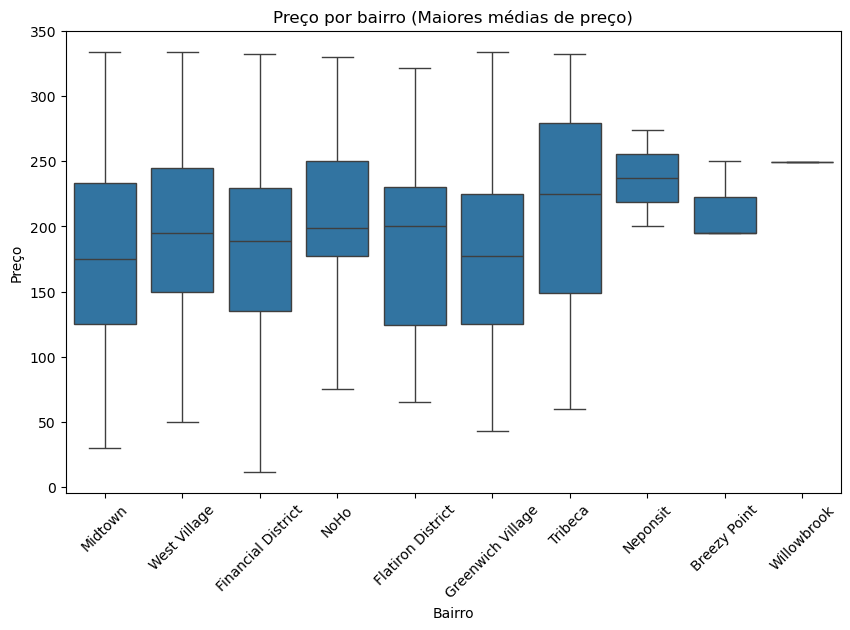

In [22]:
# Scatter plot de latitude vs longitude colorido por preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', hue='price', data=dataset_sem_outliers, palette='viridis')
plt.title('Relação entre latitude e longitude com o preço')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Boxplot do tipo de quarto versus preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=dataset_sem_outliers)
plt.title('Preço por tipo de quarto')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço')
plt.show()

# Boxplot do Distrito versus preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='bairro_group', y='price', data=dataset_sem_outliers)
plt.title('Preço por distrito')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.show

# Selecionar os principais bairros com mais registros
top_bairros = dataset_sem_outliers['bairro'].value_counts().nlargest(10).index

# Filtrar o dataset para incluir apenas esses bairros
dataset_filtrado = dataset_sem_outliers[dataset_sem_outliers['bairro'].isin(top_bairros)]

# Boxplot do Bairro versus preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='bairro', y='price', data=dataset_filtrado)
plt.title('Preço por bairro (Top 10 Bairros)')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

# Calcular a média dos preços por bairro
media_preco_bairros = dataset_sem_outliers.groupby('bairro')['price'].mean().nlargest(10).index

# Filtrar o dataset para incluir apenas esses bairros
dataset_filtrado = dataset_sem_outliers[dataset_sem_outliers['bairro'].isin(media_preco_bairros)]

# Boxplot do Bairro versus preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='bairro', y='price', data=dataset_filtrado)
plt.title('Preço por bairro (Maiores médias de preço)')
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

<b> Análise da frequência</b>
Com isso, temos uma visão completa da distribuição das variáveis categóricas.

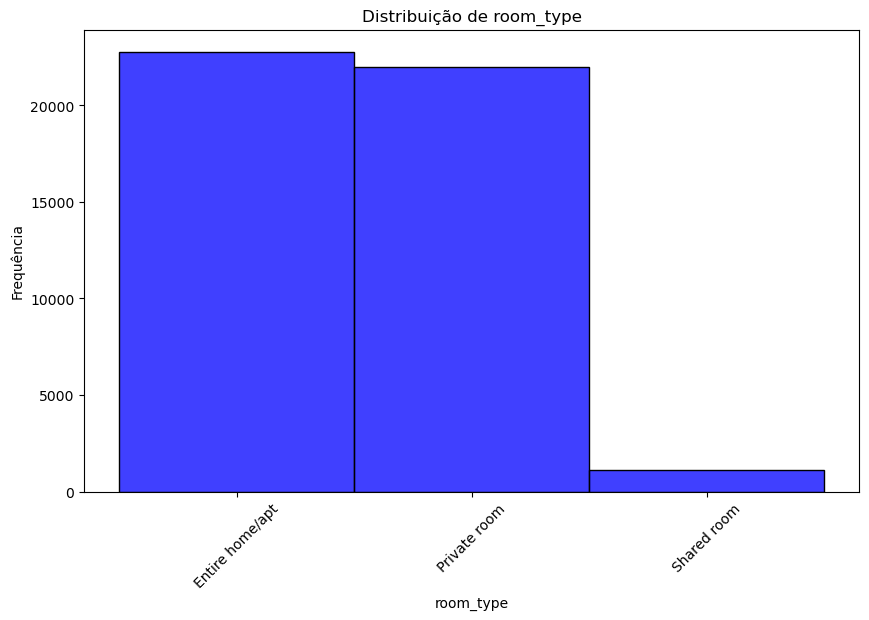

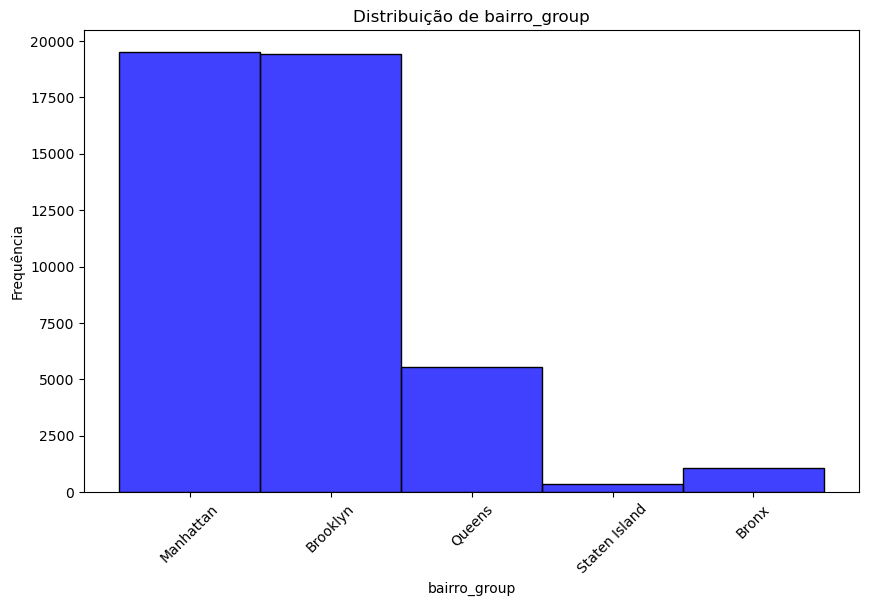

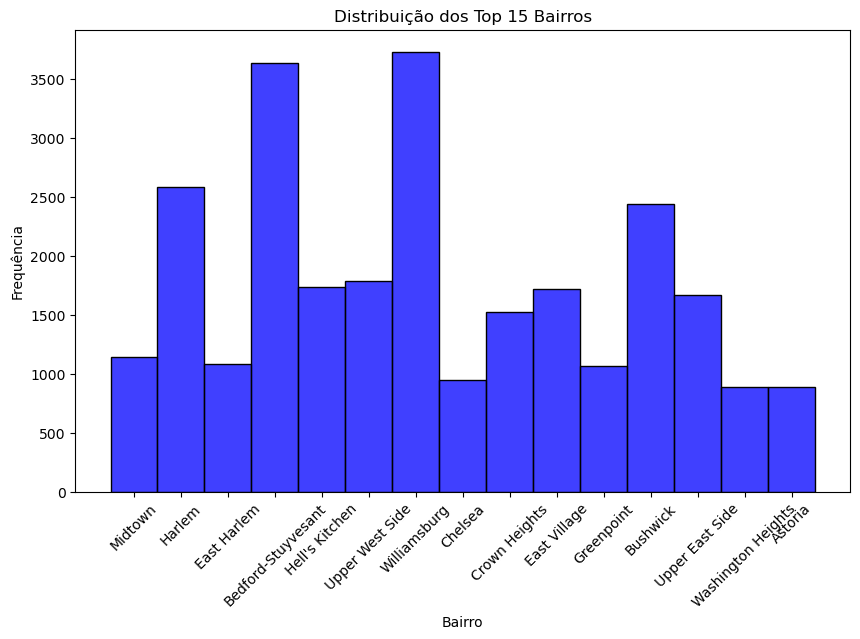

In [23]:
# Variáveis categóricas
categorical_columns = ['room_type', 'bairro_group', 'bairro']

for column in categorical_columns:
    if column == 'bairro':
        # Encontrar os 10 bairros que mais aparecem
        top_bairros = dataset_sem_outliers['bairro'].value_counts().head(15).index
        
        # Filtrar o dataset para incluir apenas os top 10 bairros
        filtered_dataset = dataset_sem_outliers[dataset_sem_outliers['bairro'].isin(top_bairros)]
        
        # Plotar o histograma para os top 15 bairros
        plt.figure(figsize=(10, 6))
        sns.histplot(data=filtered_dataset, x='bairro', kde=False, bins=20, color='blue')
        plt.title('Distribuição dos Top 15 Bairros')
        plt.xlabel('Bairro')
        plt.ylabel('Frequência')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=dataset_sem_outliers, x=column, kde=False, bins=20, color='blue')
        plt.title(f'Distribuição de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.xticks(rotation=45)
        plt.show()


<h3><b>Análise Bivariada</b></h3>
Identificar se a distancia das escolas e dos centro computacionais interferem no preço.

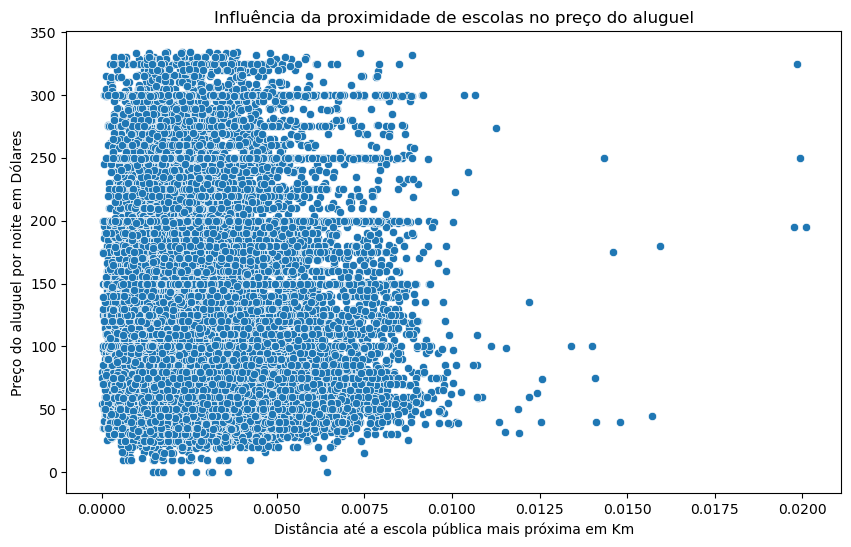

In [24]:
# Função para calcular a distância em quilômetros usando latitude e longitude
def calcular_distancia_km(lat1, lon1, lat2, lon2):
    # Raio médio da Terra em quilômetros
    R = 6371  
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distancia = R * c
    return distancia

# Garantir que os nomes das colunas estejam corretos
dataset_sem_outliers.columns = dataset_sem_outliers.columns.str.strip()
nys.columns = nys.columns.str.strip()

# Constrói a árvore com as coordenadas das escolas
escolas_coords = nys[['Latitude', 'Longitude']].values
tree = BallTree(escolas_coords, metric='euclidean')

# Calcula a distância até a escola mais próxima para cada imóvel
imoveis_coords = dataset_sem_outliers[['latitude', 'longitude']].values
distancias, _ = tree.query(imoveis_coords, k=1)

# Adiciona as distâncias ao dataset
dataset_sem_outliers['distancia_escola_mais_proxima'] = distancias

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distancia_escola_mais_proxima', y='price', data=dataset_sem_outliers)
plt.title('Influência da proximidade de escolas no preço do aluguel')
plt.xlabel('Distância até a escola pública mais próxima em Km')
plt.ylabel('Preço do aluguel por noite em Dólares')
plt.show()

Coeficiente de Correlação de Pearson: 0.004044051805710919
Valor-p: 0.38616298896488604


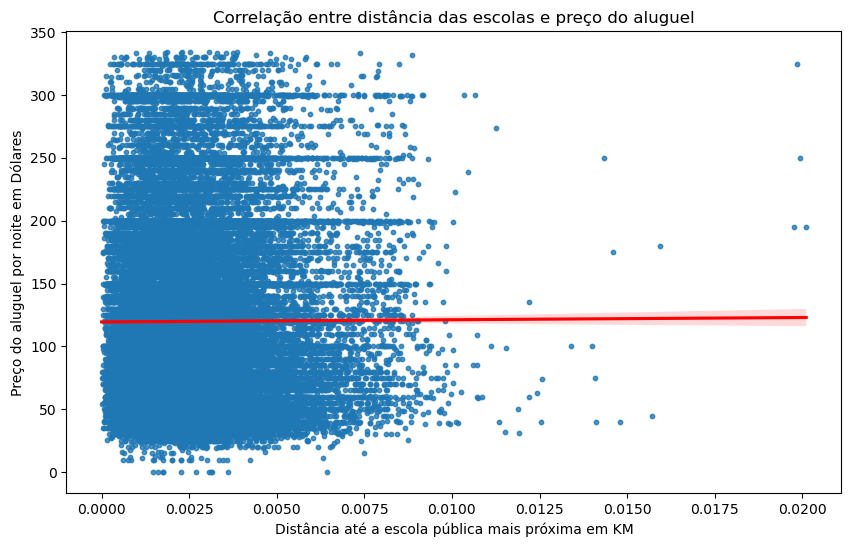

In [25]:
# Calcular a correlação de Pearson
correlation, p_value = pearsonr(dataset_sem_outliers['distancia_escola_mais_proxima'], dataset_sem_outliers['price'])
print(f"Coeficiente de Correlação de Pearson: {correlation}")
print(f"Valor-p: {p_value}")

# Plotar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='distancia_escola_mais_proxima', y='price', data=dataset_sem_outliers, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Correlação entre distância das escolas e preço do aluguel')
plt.xlabel('Distância até a escola pública mais próxima em KM')
plt.ylabel('Preço do aluguel por noite em Dólares')
plt.show()

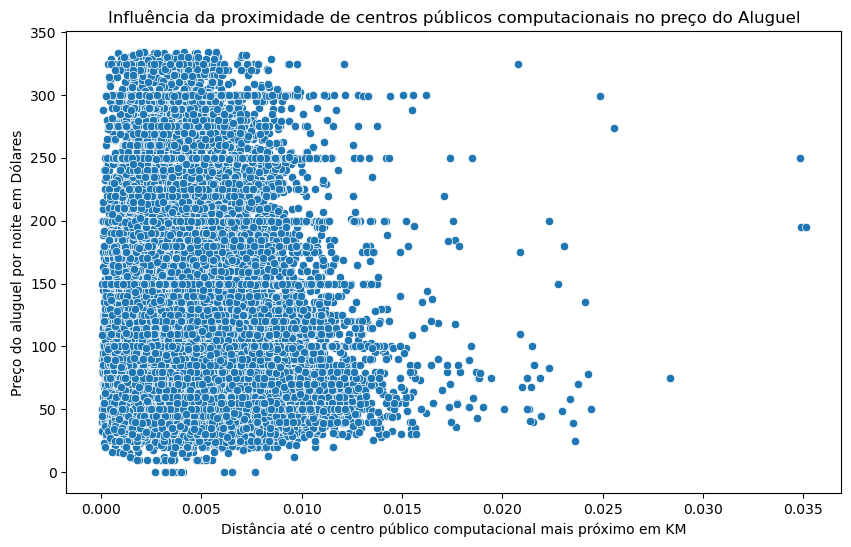

In [26]:
# Garantir que os nomes das colunas estejam corretos
pcc.columns = pcc.columns.str.strip()

# Constrói a árvore com as coordenadas dos centros públicos computacionais
pcc_coords = pcc[['Latitude', 'Longitude']].values
tree_pcc = BallTree(pcc_coords, metric='euclidean')

# Calcula a distância até o centro público computacional mais próximo para cada imóvel
imoveis_coords = dataset_sem_outliers[['latitude', 'longitude']].values
distancias_pcc, _ = tree_pcc.query(imoveis_coords, k=1)

# Adiciona as distâncias ao dataset
dataset_sem_outliers['distancia_pcc_mais_proximo'] = distancias_pcc

# Plotar o gráfico de dispersão para centros públicos computacionais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distancia_pcc_mais_proximo', y='price', data=dataset_sem_outliers)
plt.title('Influência da proximidade de centros públicos computacionais no preço do Aluguel')
plt.xlabel('Distância até o centro público computacional mais próximo em KM')
plt.ylabel('Preço do aluguel por noite em Dólares')
plt.show()

Coeficiente de Correlação de Pearson: -0.06985188141824314
Valor-p: 8.963021282581019e-51


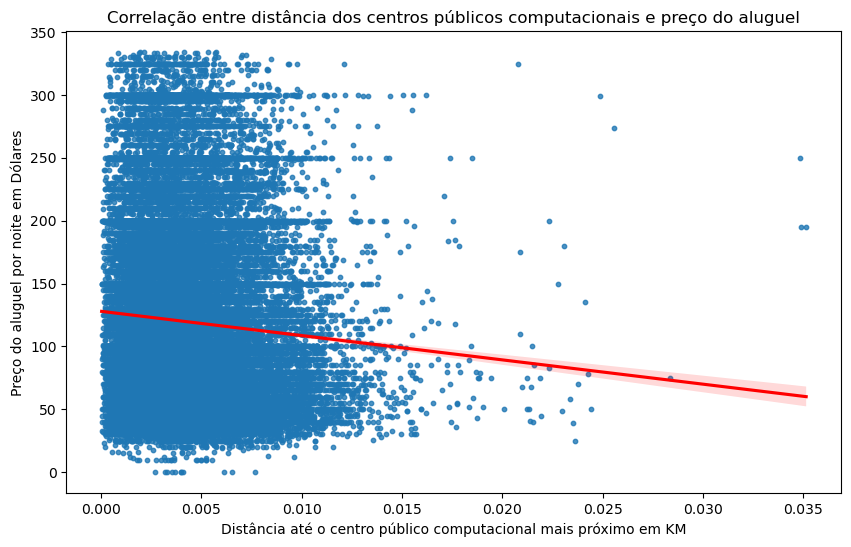

In [27]:
# Calcular a correlação de Pearson
correlation, p_value = pearsonr(dataset_sem_outliers['distancia_pcc_mais_proximo'], dataset_sem_outliers['price'])
print(f"Coeficiente de Correlação de Pearson: {correlation}")
print(f"Valor-p: {p_value}")

# Plotar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='distancia_pcc_mais_proximo', y='price', data=dataset_sem_outliers, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Correlação entre distância dos centros públicos computacionais e preço do aluguel')
plt.xlabel('Distância até o centro público computacional mais próximo em KM')
plt.ylabel('Preço do aluguel por noite em Dólares')
plt.show()

<h3><b>Análise Bivariada</b></h3>
Analise das variavéis numéricas X preço.

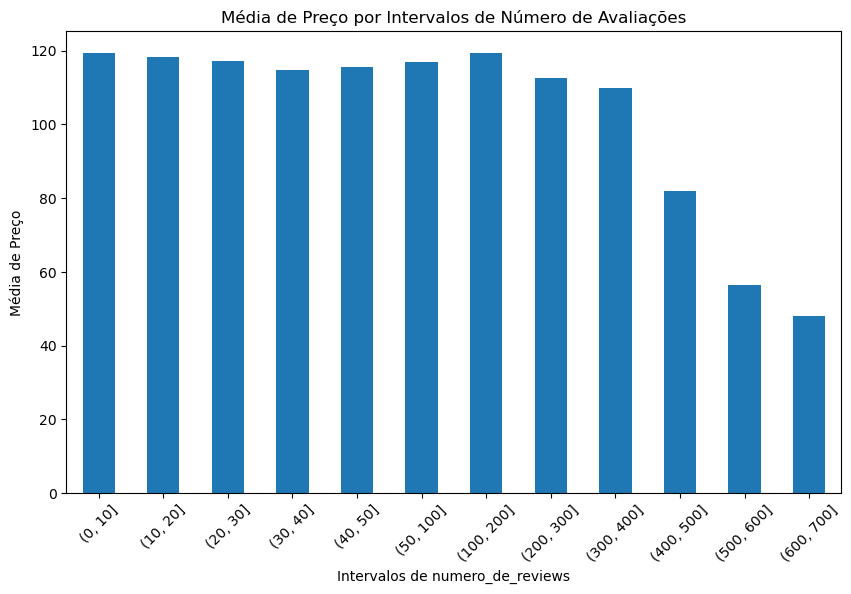

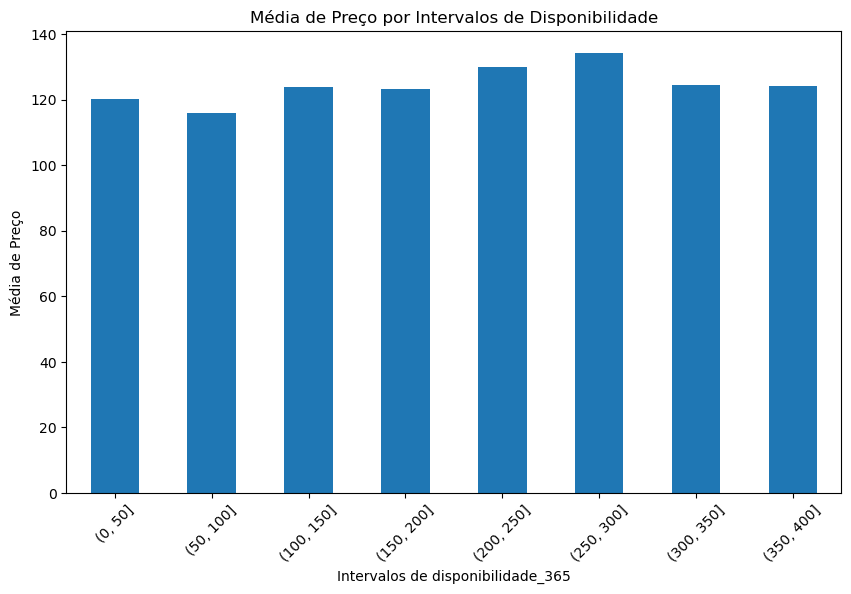

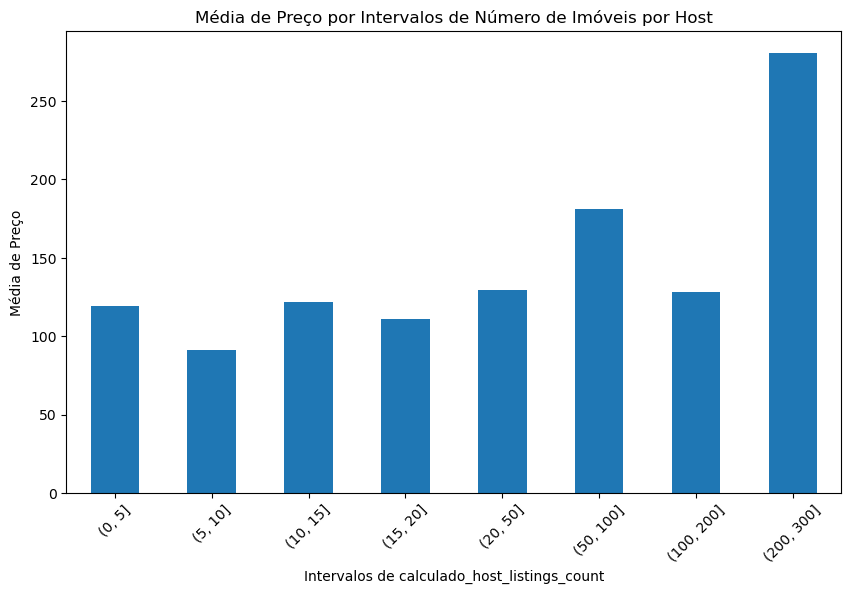

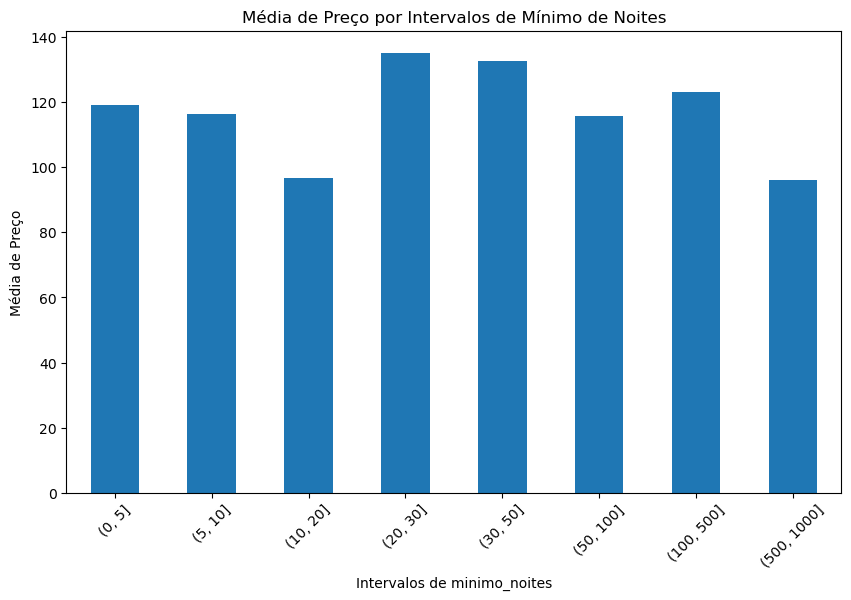

In [28]:
# Função para criar gráfico de barras da média de preço por intervalos de uma variável
def plot_price_intervalos(df, var, bins, title):
    
    # Criar intervalos para a variável
    df[f'{var}_bins'] = pd.cut(df[var], bins=bins)
    
    # Calcular a média dos preços por intervalos
    avg_price_intervalo = df.groupby(f'{var}_bins', observed=False)['price'].mean()
    
    # Plotar gráfico de barras
    plt.figure(figsize=(10, 6))
    avg_price_intervalo.plot(kind='bar')
    plt.title(title)
    plt.xlabel(f'Intervalos de {var}')
    plt.ylabel('Média de Preço')
    plt.xticks(rotation=45)
    plt.show()

# Definir intervalos (bins) para cada variável numérica
bins_reviews = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700]
bins_disponibilidade = [0, 50, 100, 150, 200, 250, 300, 350, 400]
bins_host_listings = [0, 5, 10, 15, 20, 50, 100, 200, 300]
bins_minimo_noites = [0, 5, 10, 20, 30, 50, 100, 500, 1000]

# Gerar gráficos de barras para cada variável numérica
plot_price_intervalos(dataset_sem_outliers, 'numero_de_reviews', bins_reviews, 'Média de Preço por Intervalos de Número de Avaliações')
plot_price_intervalos(dataset_sem_outliers, 'disponibilidade_365', bins_disponibilidade, 'Média de Preço por Intervalos de Disponibilidade')
plot_price_intervalos(dataset_sem_outliers, 'calculado_host_listings_count', bins_host_listings, 'Média de Preço por Intervalos de Número de Imóveis por Host')
plot_price_intervalos(dataset_sem_outliers, 'minimo_noites', bins_minimo_noites, 'Média de Preço por Intervalos de Mínimo de Noites')


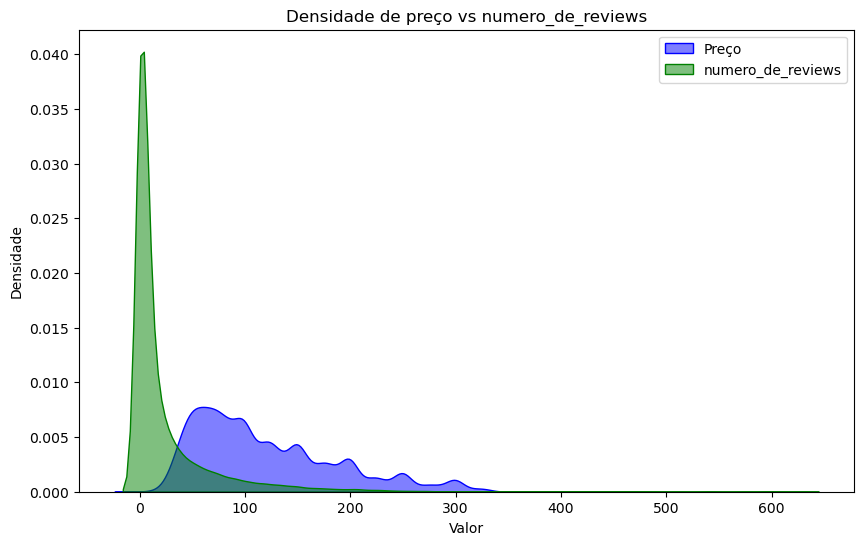

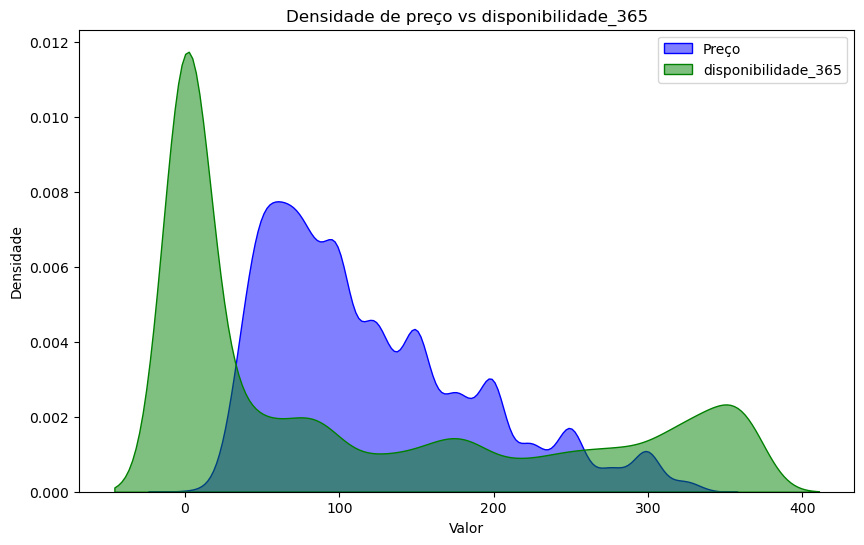

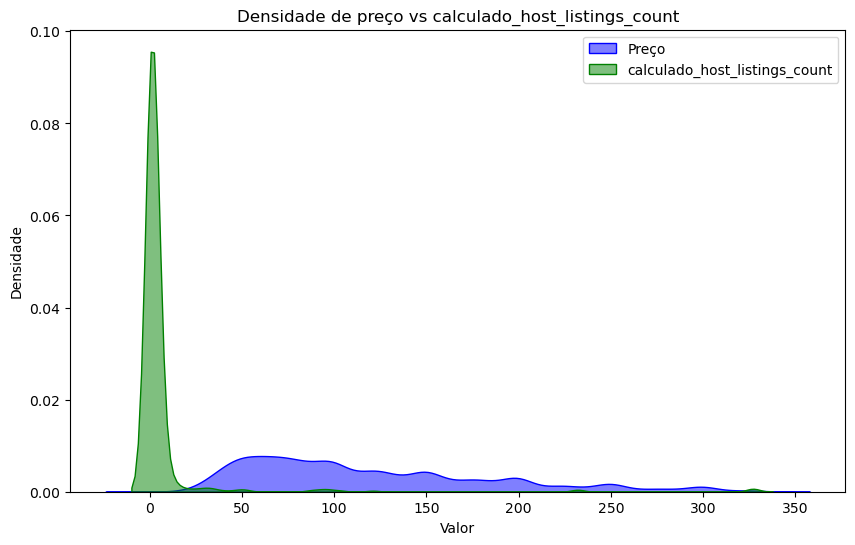

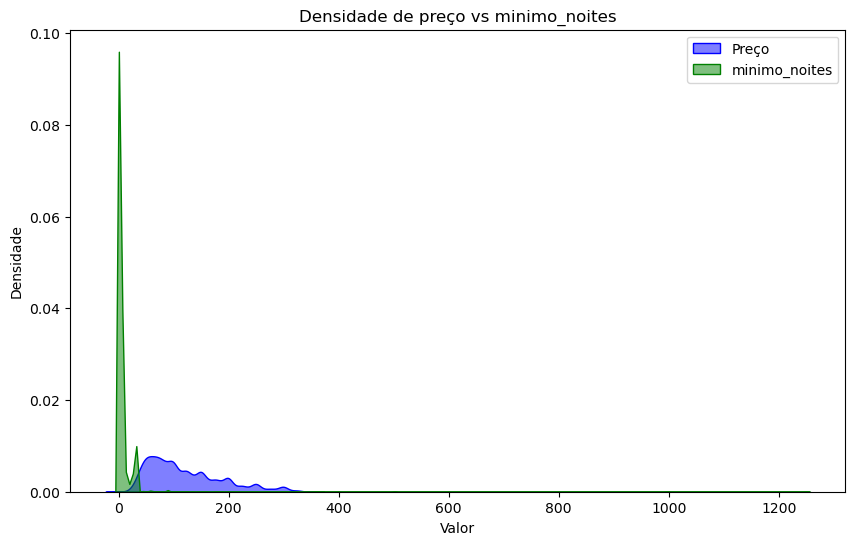

In [29]:
# Função para criar gráficos de densidade (KDE) para preço em relação a uma variável numérica
def plot_kde(df, var, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['price'], label='Preço', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df[var], label=var, fill=True, color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

# Variáveis numéricas para análise
numerical_columns = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites']

# Gerar gráficos de densidade para cada variável numérica
for column in numerical_columns:
    plot_kde(dataset_sem_outliers, column, f'Densidade de preço vs {column}')


<b>Normalização de dados:</b>

Com base nas prmeiras analises necessário realizar a normalização de dados distribuidos da seguinte forma:

<ul>
    <li>StandardScaler para colunas que têm distribuições próximas do normal: numero_de_reviews, disponibilidade_365, calculado_host_listings_count. </li>
    <li>MinMaxScaler para colunas que têm distribuições enviesadas ou valores extremos: minimo_noites, distancia_escola_mais_proxima, distancia_pcc_mais_proximo.
</ul>


In [30]:
# Colunas a serem normalizadas com StandardScaler
cols_standard = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count']

# Colunas a serem normalizadas com MinMaxScaler
cols_minmax = ['minimo_noites', 'distancia_escola_mais_proxima', 'distancia_pcc_mais_proximo']

# Criando instâncias dos escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicando StandardScaler
dataset_sem_outliers[cols_standard] = scaler_standard.fit_transform(dataset_sem_outliers[cols_standard])

# Aplicando MinMaxScaler
dataset_sem_outliers[cols_minmax] = scaler_minmax.fit_transform(dataset_sem_outliers[cols_minmax])

<h3><b>Análise de Correlação</b></h3>
Fazer a correlação de todas as colunas numéricas em uma matriz visual.

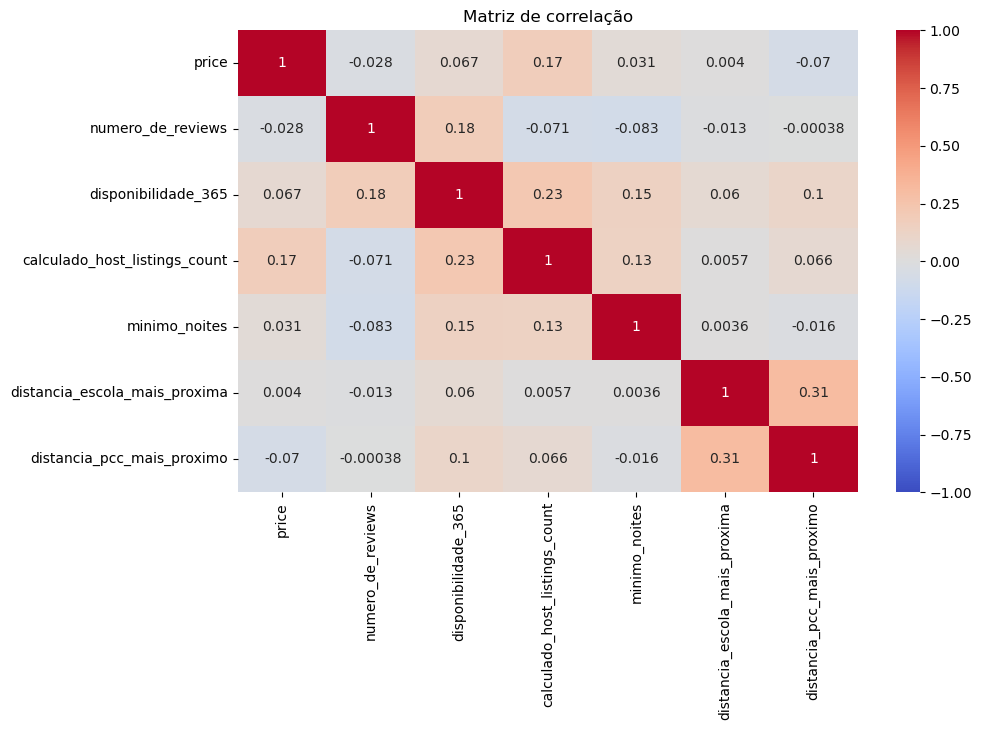

In [31]:
# Selecionar apenas as colunas numéricas
numerical_columns = ['price', 'numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites','distancia_escola_mais_proxima', 'distancia_pcc_mais_proximo']

# Calcular a matriz de correlação
correlation_matrix = dataset_sem_outliers[numerical_columns].corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlação')
plt.show()

<h3><b>Análise Multivariada</b></h3>
Os gráficos de pares nos permitirão visualizar as relações entre as variáveis, incluindo a distribuição dos dados e as correlações.

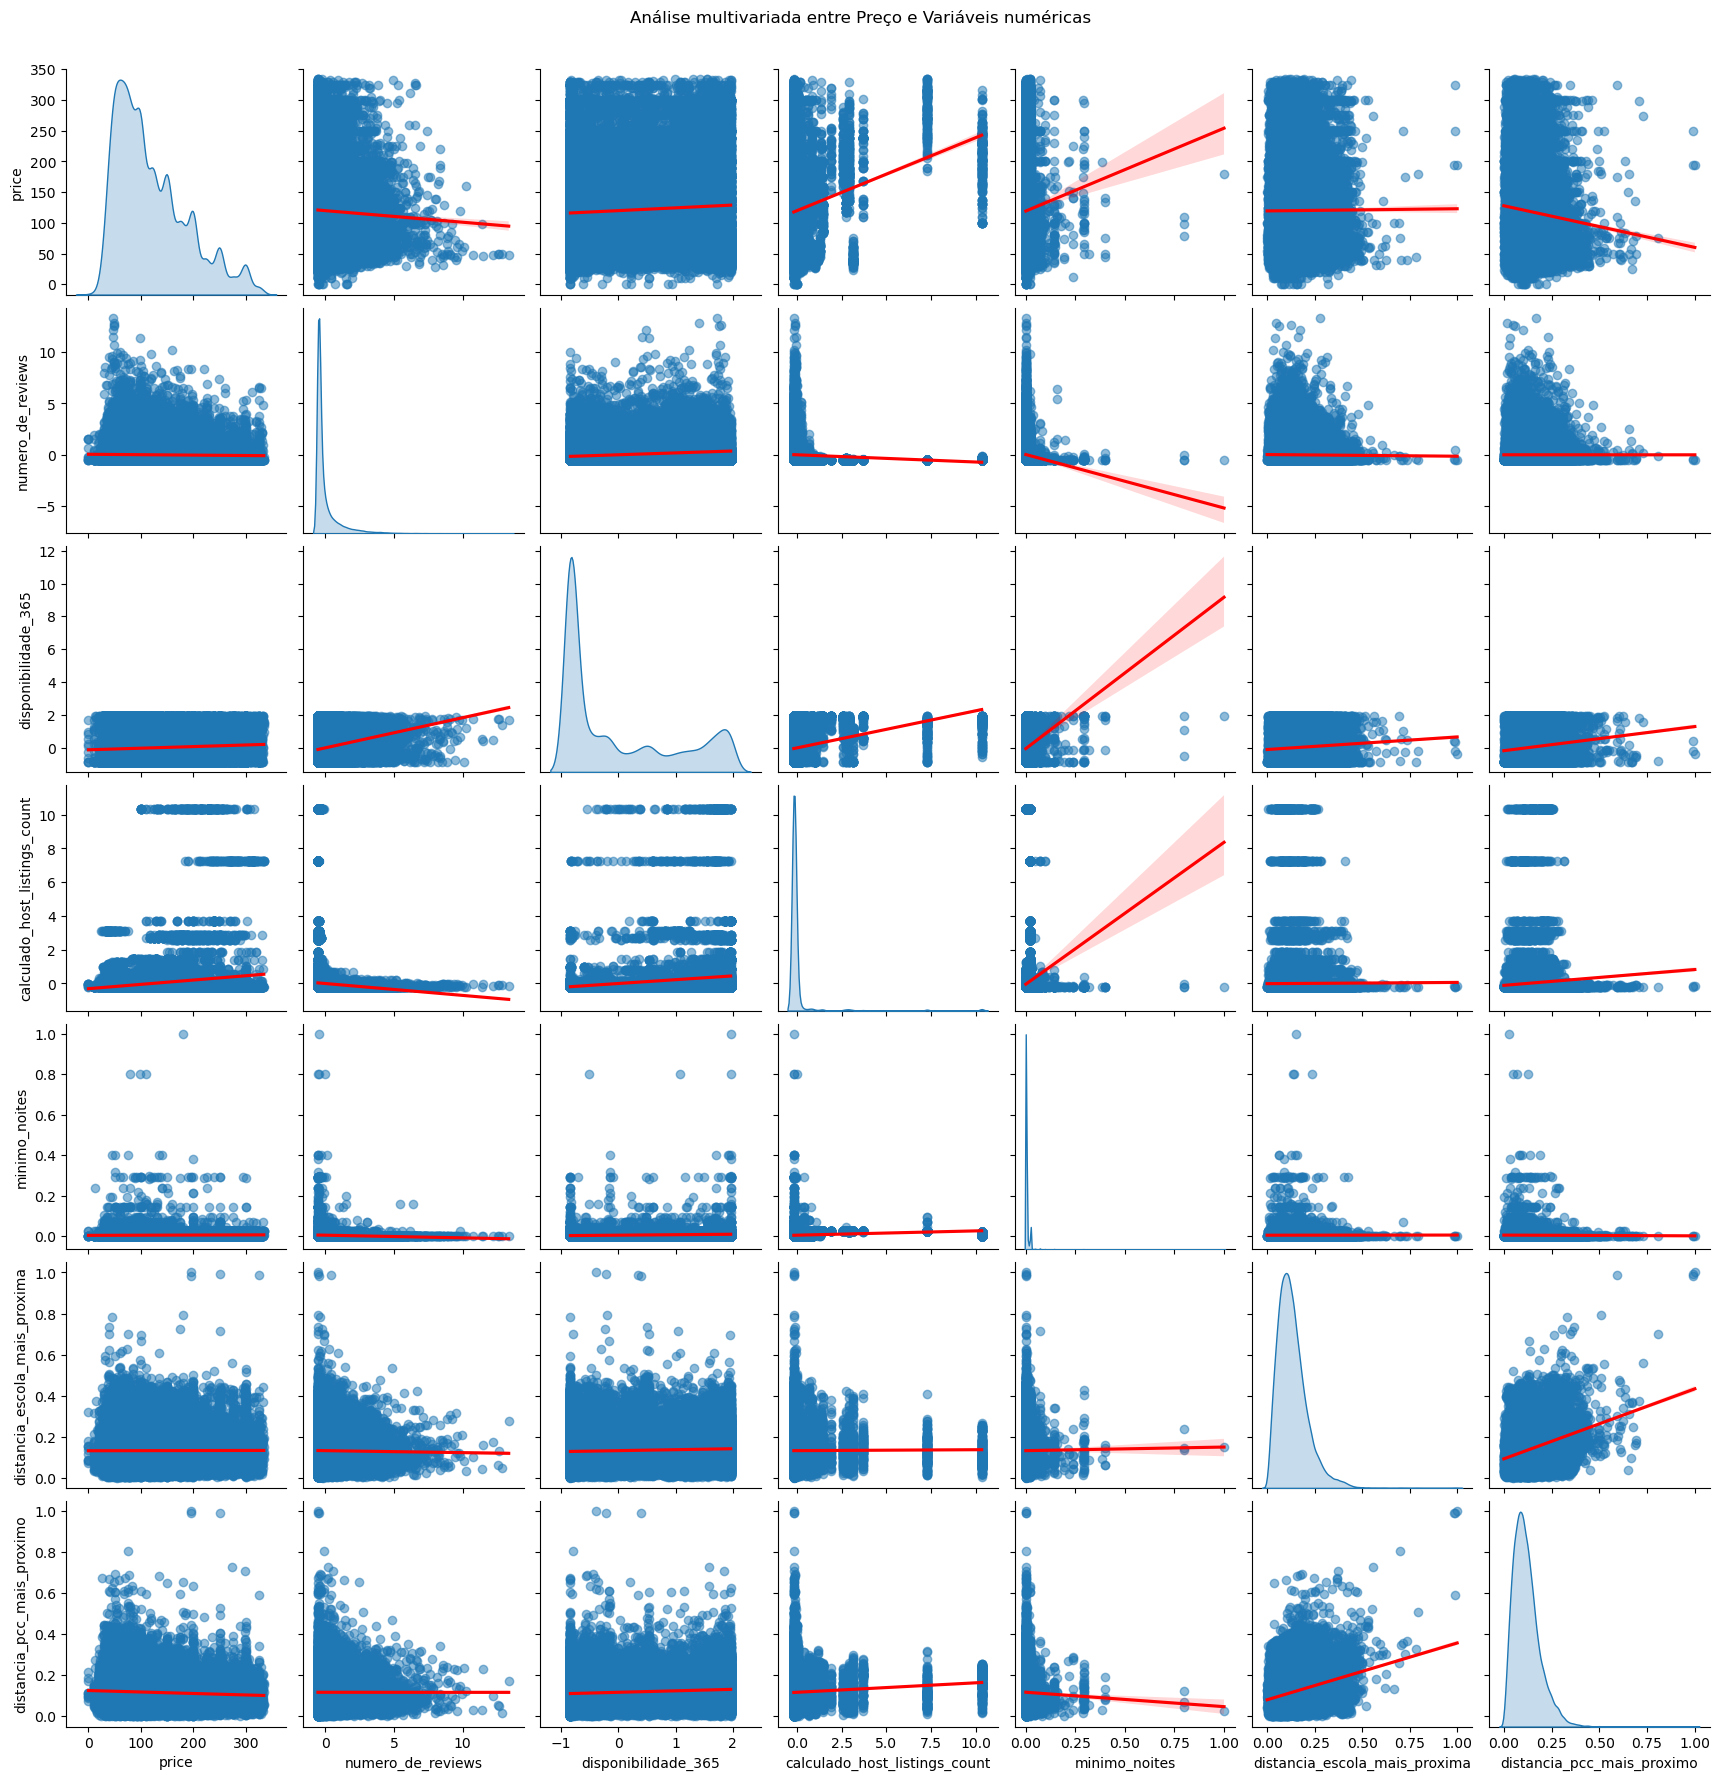

In [32]:
# Criar pairplot para visualizar a interação entre variáveis
sns.pairplot(dataset_sem_outliers, vars=numerical_columns, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}})
plt.suptitle('Análise multivariada entre Preço e Variáveis numéricas', y=1.02)
plt.show()

<h3><b>Análise exclusiva na variável Nome</b></h3>
Por ser uma solicitação do cliente, faremos uma analise detalhada desse campo para localizar padrões. <br>
<b>Observação</b>, exluimos algumas palavras da analise ("in", "2", "1", "the", "of", "lo", "o4","di", "al", "et", "to") pois não se fere a nada e estava dificultando uma análise precisa.

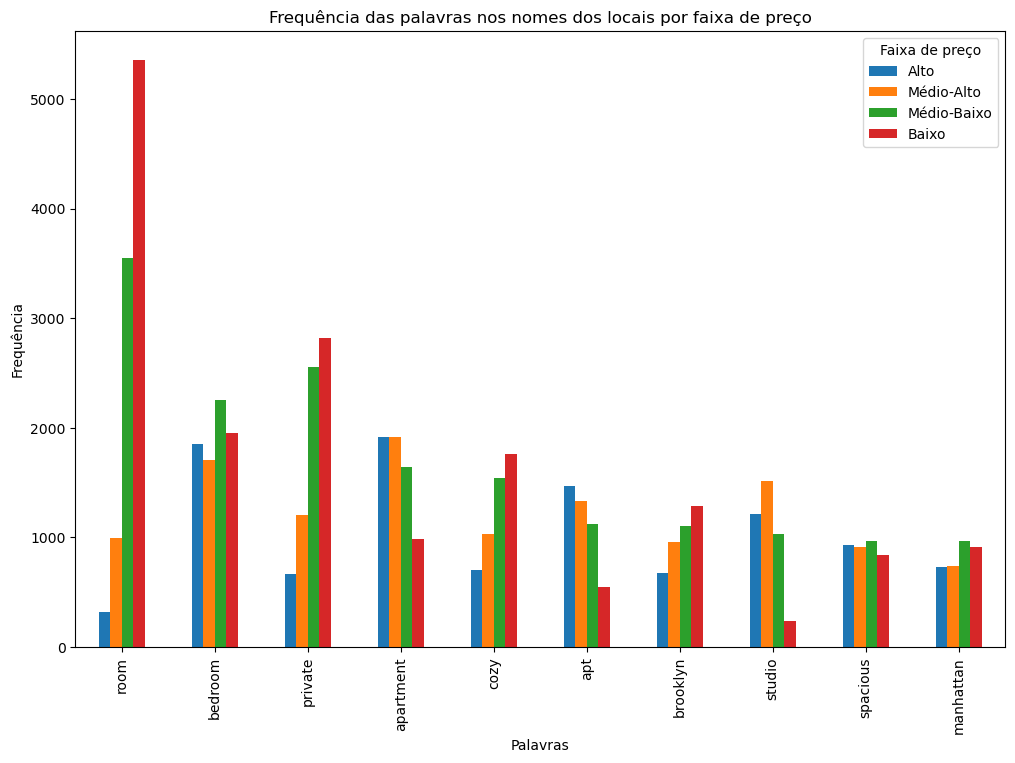

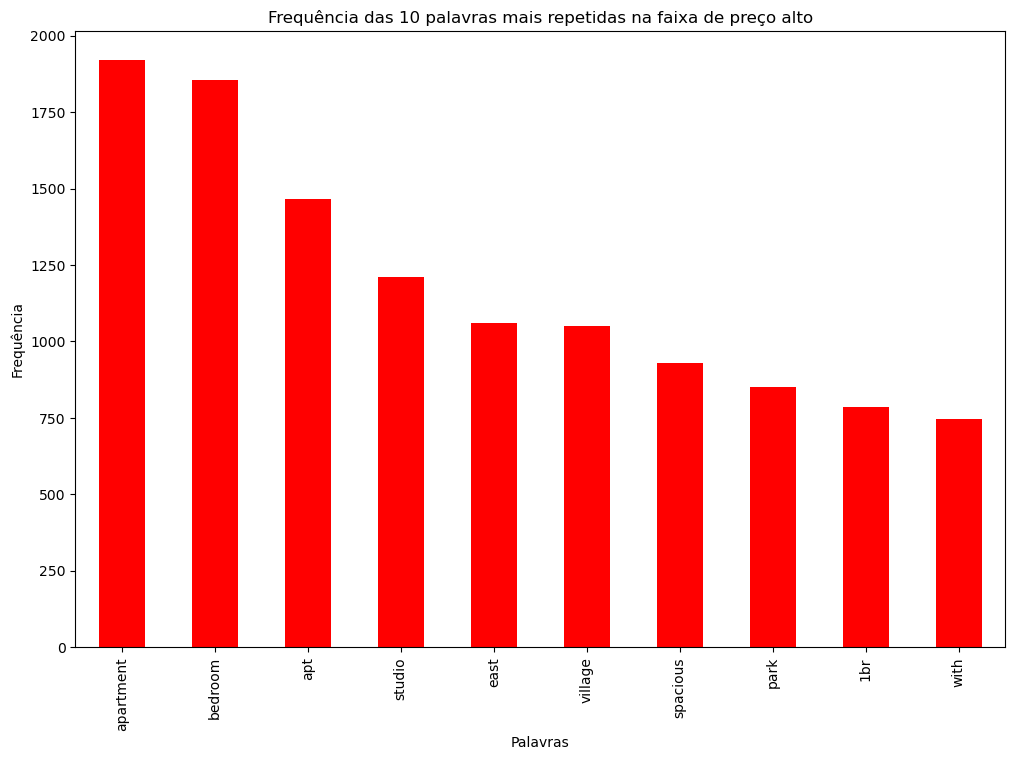

In [33]:
# Divida os preços em quartis
dataset_sem_outliers['faixa_preco'] = pd.qcut(dataset_sem_outliers['price'], q=4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])

# Função para contar as palavras mais frequentes em uma coluna de texto
def contar_palavras(texto):
    
    # Remove caracteres especiais e divide por espaço
    palavras = re.findall(r'\b\w+\b', texto.lower())
    return Counter(palavras)

# Contar palavras para cada faixa de preço
contagens_palavras = {}
for faixa in dataset_sem_outliers['faixa_preco'].unique():
    texto_concatenado = ' '.join(dataset_sem_outliers[dataset_sem_outliers['faixa_preco'] == faixa]['nome'].astype(str).values)
    contagens_palavras[faixa] = contar_palavras(texto_concatenado)

# Transformar as contagens em um DataFrame para visualização
df_palavras = pd.DataFrame(contagens_palavras).fillna(0).astype(int)

# Selecionar as palavras mais comuns (top 10) para visualização, excluindo palavras sem sentido
excluir_palavras = ["in", "2", "1", "the", "of", "lo", "o4","di", "al", "et", "to"]
top_palavras = df_palavras.sum(axis=1).sort_values(ascending=False).index
top_palavras_filtradas = [palavra for palavra in top_palavras if palavra not in excluir_palavras]
df_top_palavras = df_palavras.loc[top_palavras_filtradas[:10]]

# Verificar se df_top_palavras não está vazio antes de plotar
if not df_top_palavras.empty:
    # Plotar as contagens de palavras para cada faixa de preço
    df_top_palavras.plot(kind='bar', figsize=(12, 8))
    plt.title('Frequência das palavras nos nomes dos locais por faixa de preço')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.legend(title='Faixa de preço')
    plt.show()
else:
    print("DataFrame df_top_palavras está vazio. Não há dados suficientes para plotar o gráfico.")

# Selecionar as palavras mais comuns na faixa de preço 'Alto', excluindo palavras específicas
top_palavras_alto = df_palavras['Alto'].sort_values(ascending=False).index
top_palavras_alto_filtradas = [palavra for palavra in top_palavras_alto if palavra not in excluir_palavras]
df_top_palavras_alto = df_palavras.loc[top_palavras_alto_filtradas[:10], 'Alto']

# Verificar se df_top_palavras_alto não está vazio antes de plotar
if not df_top_palavras_alto.empty:
    # Plotar as contagens de palavras na faixa de preço 'Alto'
    df_top_palavras_alto.plot(kind='bar', figsize=(12, 8), color='red')
    plt.title('Frequência das 10 palavras mais repetidas na faixa de preço alto')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("DataFrame df_top_palavras_alto está vazio. Não há dados suficientes para plotar o gráfico.")


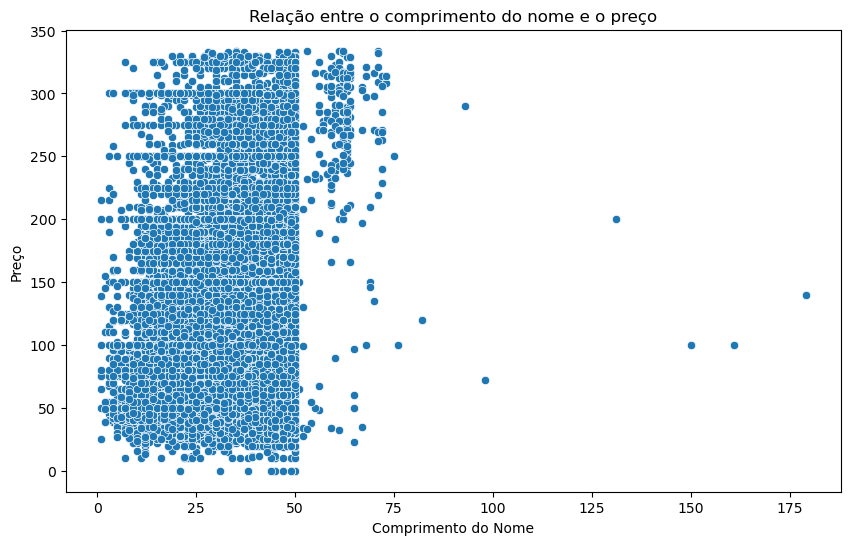

In [34]:
# Garantir que todos os valores sejam strings
dataset_sem_outliers['nome'] = dataset_sem_outliers['nome'].astype(str)  

# Criar uma nova coluna com o comprimento do texto em 'nome'
dataset_sem_outliers['nome_length'] = dataset_sem_outliers['nome'].apply(len)

# Plotar o gráfico de dispersão comparando comprimento do nome com preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nome_length', y='price', data=dataset_sem_outliers)
plt.title('Relação entre o comprimento do nome e o preço')
plt.xlabel('Comprimento do Nome')
plt.ylabel('Preço')
plt.show()


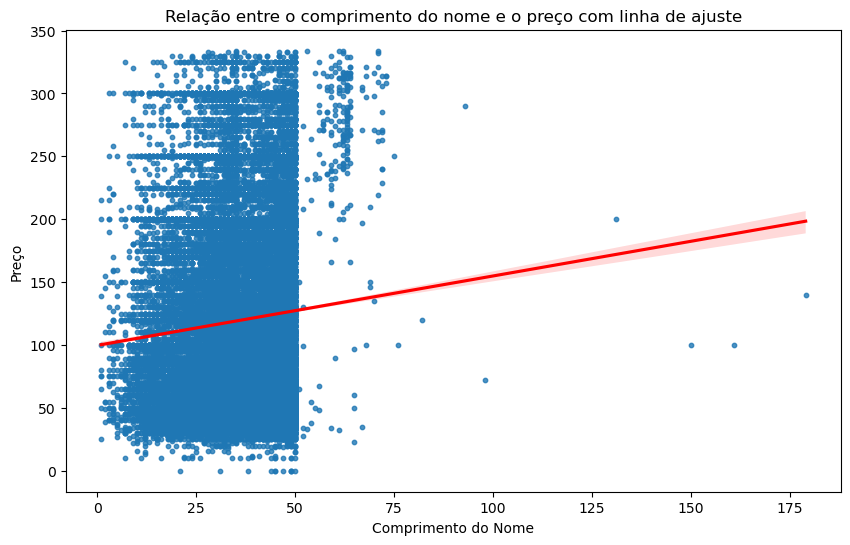

In [35]:
# Criar uma nova coluna com o comprimento do texto em 'nome'
dataset_sem_outliers['nome_length'] = dataset_sem_outliers['nome'].apply(len)

# Plotar o gráfico de dispersão com linha de ajuste
plt.figure(figsize=(10, 6))
sns.regplot(x='nome_length', y='price', data=dataset_sem_outliers, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação entre o comprimento do nome e o preço com linha de ajuste')
plt.xlabel('Comprimento do Nome')
plt.ylabel('Preço')
plt.show()


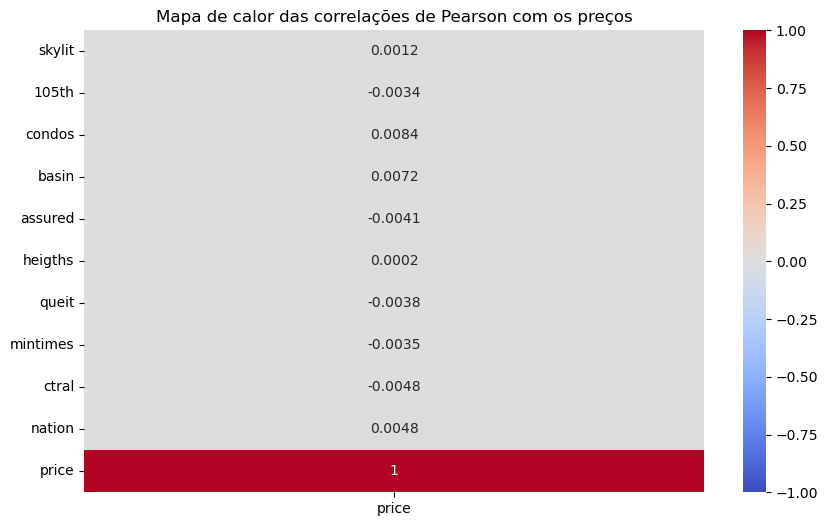

skylit      0.001235
105th      -0.003386
condos      0.008424
basin       0.007217
assured    -0.004106
heigths     0.000197
queit      -0.003764
mintimes   -0.003490
ctral      -0.004791
nation      0.004817
Name: price, dtype: float64


In [36]:
# Função para remover caracteres não suportados
def substituir_caracteres(texto):
    # Substitui caracteres CJK por uma string 'caracter NP'
    texto = re.sub(r'[\u4e00-\u9fff]+', 'caracter NP', texto)
    return texto

# Aplicar a função ao nome das propriedades
dataset_sem_outliers['nome'] = dataset_sem_outliers['nome'].apply(substituir_caracteres)

# Contar as palavras mais frequentes em 'nome', excluindo palavras específicas
excluir_palavras = ["in", "2", "1", "the", "of", "lo", "o4","di", "al", "et"]
palavras = re.findall(r'\b\w+\b', ' '.join(dataset_sem_outliers['nome'].astype(str).values).lower())
contagem_palavras = Counter(palavras)

# Selecionar as palavras mais comuns (top 10), excluindo palavras específicas
top_palavras = [palavra for palavra in contagem_palavras if palavra not in excluir_palavras]
top_palavras = pd.Series(Counter(top_palavras)).sort_values(ascending=False).head(10).index

# Criar uma nova coluna para cada palavra mais comum
for palavra in top_palavras:
    dataset_sem_outliers[palavra] = dataset_sem_outliers['nome'].apply(lambda x: palavra in x.lower()).astype(int)  # Convertendo para int

# Calcular a correlação de Pearson entre as variáveis dummy e os preços reais
colunas_correlacao = list(top_palavras) + ['price']
correlacao = dataset_sem_outliers[colunas_correlacao].corr(method='pearson')

# Filtrar a correlação dos preços com as palavras mais usadas
correlacao_preco = correlacao['price'].drop('price')

# Visualizar a correlação com um mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao[['price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor das correlações de Pearson com os preços')
plt.show()

# Exibir a tabela de correlações
print(correlacao_preco)



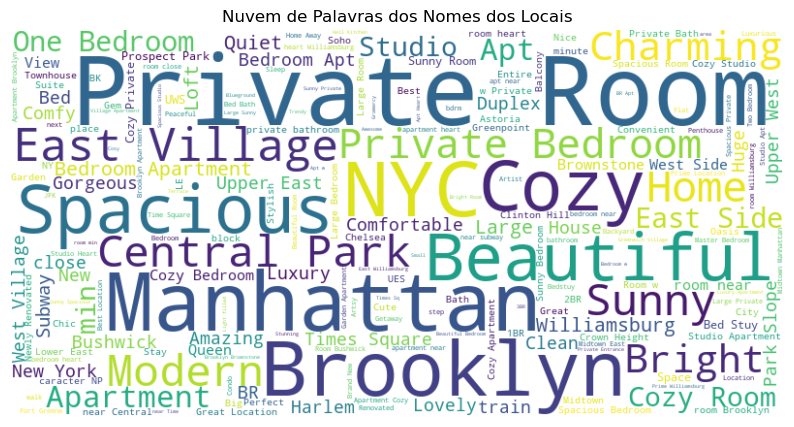

In [37]:
# Função para remover caracteres não suportados
def substituir_caracteres(texto):
    # Substitui caracteres CJK por uma string 'caracter NP'
    texto = re.sub(r'[\u4e00-\u9fff]+', 'caracter NP', texto)
    return texto

# Aplicar a função ao nome das propriedades
dataset_sem_outliers['nome'] = dataset_sem_outliers['nome'].apply(substituir_caracteres)

# Concatenar todos os nomes em uma única string, excluindo palavras específicas
excluir_palavras = ["in", "2", "1", "the", "of", "lo", "o4", "di", "al", "et"]
texto_concatenado = ' '.join(dataset_sem_outliers['nome'].astype(str).values)
palavras_filtradas = ' '.join([palavra for palavra in texto_concatenado.split() if palavra.lower() not in excluir_palavras])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(palavras_filtradas)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Nomes dos Locais')
plt.show()


In [38]:
# Verificar e padronizar os nomes dos bairros para garantir correspondência
dataset_sem_outliers['bairro'] = dataset_sem_outliers['bairro'].str.lower().str.strip()
vib['NEIGHBORHOOD'] = vib['NEIGHBORHOOD'].str.lower().str.strip()

# Calcular a renda anual de aluguel
dataset_sem_outliers['renda_anual_aluguel'] = dataset_sem_outliers['price'] * dataset_sem_outliers['disponibilidade_365']

# Unir os DataFrames
merged_df = pd.merge(dataset_sem_outliers, vib, how='left', left_on='bairro', right_on='NEIGHBORHOOD')

# Calcular o ROI
merged_df['ROI'] = (merged_df['renda_anual_aluguel'] / merged_df['AVERAGE SALE PRICE']) * 100

# Classificar os bairros pelo ROI (Retorno sobre o Investimento)
bairros_custo_beneficio = merged_df.groupby('bairro').agg({
    'ROI': 'mean',
    'renda_anual_aluguel': 'mean',
    'AVERAGE SALE PRICE': 'mean'
}).sort_values(by='ROI', ascending=False)

# Exibir os melhores bairros para investir
print(bairros_custo_beneficio.head(10))


                        ROI  renda_anual_aluguel  AVERAGE SALE PRICE
bairro                                                              
willowbrook        0.060457           461.835219        7.645180e+05
mill basin         0.028291           291.514034        1.041478e+06
tottenville        0.020602           186.273033        9.234365e+05
mariners harbor    0.019564            94.415990        4.956547e+05
castleton corners  0.016391           120.007545        7.369843e+05
belle harbor       0.016386           161.450630        1.017000e+06
st. albans         0.014088            94.051487        6.718547e+05
stapleton          0.013624            73.879796        5.586150e+05
neponsit           0.013063           166.062137        1.271242e+06
williamsbridge     0.012713            84.846950        6.809070e+05


## Pré-processamento e treinamento de ML
<a id="pre-processamento-treinamento"></a>
<p>
Regressão linear, implantação de cluster e treinamento de ML<br>
</p>

<h3><b>Regressão Linear Múltipla</b></h3>
Quantificar a relação entre o preço e as variáveis independentes.

In [39]:
# Definir as variáveis independentes (X) e a variável dependente (y), excluindo a colna preço
X = dataset_sem_outliers[numerical_columns[1:]] 
y = dataset_sem_outliers['price']

# Adicionar uma constante para o modelo de regressão
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     315.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:55:15   Log-Likelihood:            -2.5810e+05
No. Observations:               45922   AIC:                         5.162e+05
Df Residuals:                   45915   BIC:                         5.163e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<b>Encapsular a lógica de cálculo</b><br>
Para calcular automáticamente as distâncias até a escola mais próxima e o centro público computacional mais próximo para novos dados.

In [40]:
def calcular_distancia_km(lat1, lon1, lat2, lon2):
    R = 6371  # Raio médio da Terra em quilômetros
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distancia = R * c
    return distancia

def calcular_distancia_mais_proxima(lat, lon, tree):
    distancia, _ = tree.query([[lat, lon]], k=1)
    return distancia[0][0]

# Garantir que os nomes das colunas estejam corretos
dataset_sem_outliers.columns = dataset_sem_outliers.columns.str.strip()
nys.columns = nys.columns.str.strip()
pcc.columns = pcc.columns.str.strip()

# Constrói a árvore com as coordenadas das escolas
escolas_coords = nys[['Latitude', 'Longitude']].values
tree_escolas = BallTree(escolas_coords, metric='euclidean')

# Constrói a árvore com as coordenadas dos centros públicos computacionais
pcc_coords = pcc[['Latitude', 'Longitude']].values
tree_pcc = BallTree(pcc_coords, metric='euclidean')


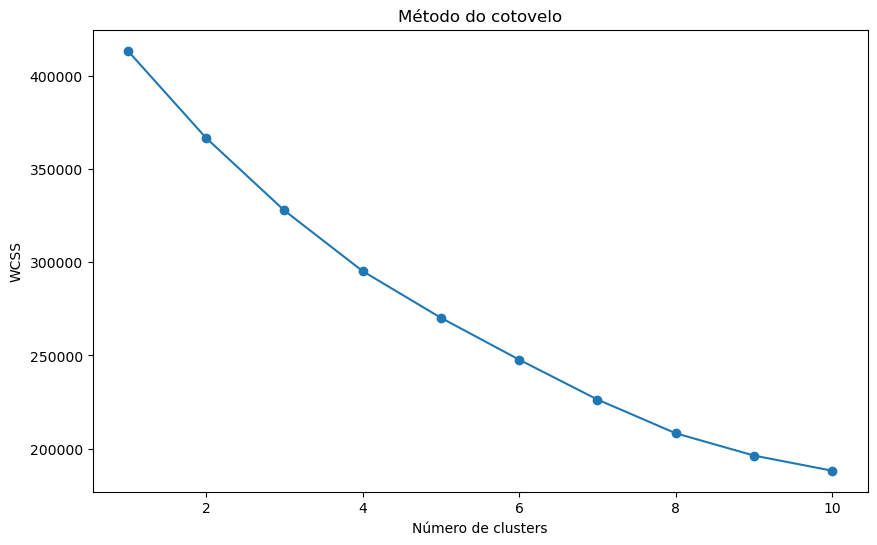

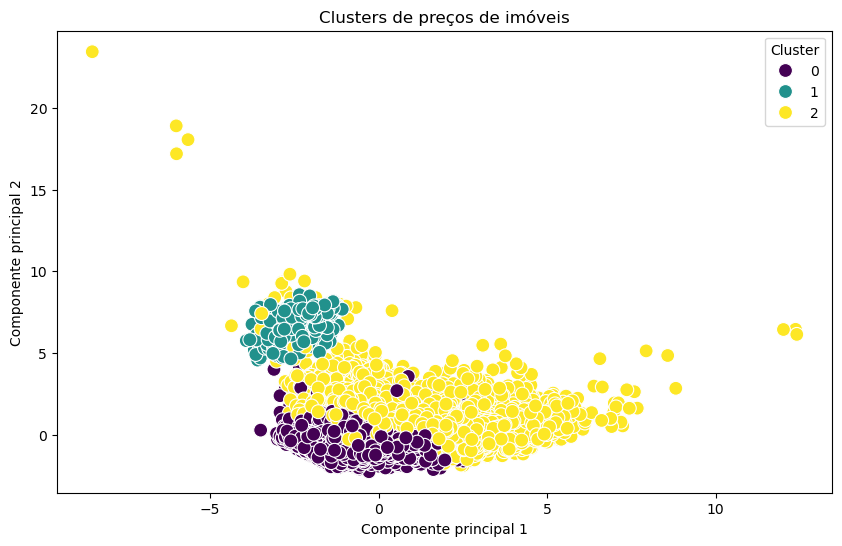

In [41]:
# Selecionando as colunas numéricas
numerical_columns = ['price', 'numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites',
                     'distancia_escola_mais_proxima', 'distancia_pcc_mais_proximo', 'latitude', 'longitude']
numerical_data = dataset_sem_outliers[numerical_columns]

# Normalizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Determinar o número ideal de clusters (usando o método do cotovelo)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Escolher o número de clusters (n_clusters) com base no gráfico
n_clusters = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Adicionar os rótulos dos clusters ao dataset original
dataset_sem_outliers['Cluster'] = cluster_labels

# Plotar os clusters (usando PCA para redução de dimensionalidade)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title('Clusters de preços de imóveis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.show()


<h3><b>Modelo Utilizado</b></h3>
Random Forest Regressor

In [42]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Previsão e avaliação
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
# Exibir o R2 como porcentagem
r2_porcentagem = r2 * 100

print(f'Erro Médio absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')

Erro Médio absoluto: 32.16653928506623
R²: 55.89%


<h3><b>Ajuste, tentativa com:</b></h3>
Validação cruzada ao modelo Random Forest Regressor

In [43]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Validação Cruzada
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scores = cross_val_score(modelo, X, y, cv=5, scoring=scorer)
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Avaliação do modelo
mean_score = -scores.mean()
mean_r2_score = r2_scores.mean() * 100

print(f'Erro Médio Absoluto (Validação Cruzada): {mean_score}')
print(f'R² (Validação Cruzada): {mean_r2_score:.2f}%')

# Previsão e avaliação no conjunto de teste
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')


Erro Médio Absoluto (Validação Cruzada): 33.580545824869105
R² (Validação Cruzada): 53.28%
Erro Médio Absoluto: 32.16653928506623
R²: 55.89%


<h3><b>Ajuste, tentativa com:</b></h3>
Engineering: transformar features existentes, interações entre latitude e longitude.

In [44]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features (exemplo de interação entre latitude e longitude)
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']  # Certifique-se de que a coluna 'price' exista no DataFrame

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Previsão e avaliação
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)

# Exibir o R2 como porcentagem
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')

Erro Médio Absoluto: 32.199789874795854
R²: 55.79%


<h3><b>Ajuste, tentativa com:</b></h3>
Outro Modelo: Gradient Boosting Regressor (XGBoost), pode capturar relações mais complexas.

In [45]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features (exemplo de interação entre latitude e longitude)
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']  # Certifique-se de que a coluna 'price' exista no DataFrame

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo XGBoost Regressor
modelo = xgb.XGBRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Previsão e avaliação
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)

# Exibir o R2 como porcentagem
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')

Erro Médio Absoluto: 31.837438005666467
R²: 57.05%


<h3><b>Ajuste, tentativa com:</b></h3>
validação cruzada usando o modelo XGBoost

In [46]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features (exemplo de interação entre latitude e longitude)
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']  # Certifique-se de que a coluna 'price' exista no DataFrame

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo XGBoost Regressor
modelo = xgb.XGBRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Validação Cruzada
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scores = cross_val_score(modelo, X, y, cv=5, scoring=scorer)
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Avaliação do modelo
mean_score = -scores.mean()
mean_r2_score = r2_scores.mean() * 100

print(f'Erro Médio Absoluto (Validação Cruzada): {mean_score}')
print(f'R² (Validação Cruzada): {mean_r2_score:.2f}%')

# Previsão e avaliação no conjunto de teste
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')


Erro Médio Absoluto (Validação Cruzada): 33.10918632194813
R² (Validação Cruzada): 54.75%
Erro Médio Absoluto: 31.837438005666467
R²: 57.05%


<h3><b>Ajuste, tentativa com:</b></h3>
Outro Modelo: Light Gradient Boosting Machine (LightGBM)

In [47]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features latitude e longitude
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
modelo.fit(X_treino, y_treino)

# Validação Cruzada
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scores = cross_val_score(modelo, X, y, cv=5, scoring=scorer)
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Avaliação do modelo
mean_score = -scores.mean()
mean_r2_score = r2_scores.mean() * 100

print(f'Erro Médio Absoluto (Validação Cruzada): {mean_score}')
print(f'R² (Validação Cruzada): {mean_r2_score:.2f}%')

# Previsão e avaliação no conjunto de teste
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')


Erro Médio Absoluto (Validação Cruzada): 32.913972351671035
R² (Validação Cruzada): 55.29%
Erro Médio Absoluto: 31.84461902040247
R²: 57.12%


<h3><b>Ajuste, tentativa com:</b></h3>
Outro Modelo: CatBoost

In [48]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features (exemplo de interação entre latitude e longitude)
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo CatBoost Regressor
modelo = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
modelo.fit(X_treino, y_treino)

# Validação Cruzada
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scores = cross_val_score(modelo, X, y, cv=5, scoring=scorer)
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Avaliação do modelo
mean_score = -scores.mean()
mean_r2_score = r2_scores.mean() * 100

print(f'Erro Médio Absoluto (Validação Cruzada): {mean_score}')
print(f'R² (Validação Cruzada): {mean_r2_score:.2f}%')

# Previsão e avaliação no conjunto de teste
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')

Erro Médio Absoluto (Validação Cruzada): 32.953163637706076
R² (Validação Cruzada): 55.19%
Erro Médio Absoluto: 32.08692920126448
R²: 56.68%


<h3><b>Ajuste, tentativa com:</b></h3>
Outro Modelo: ElasticNet.

In [49]:
# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features (exemplo de interação entre latitude e longitude)
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo ElasticNet
modelo = ElasticNet(random_state=42)
modelo.fit(X_treino, y_treino)

# Validação Cruzada
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scores = cross_val_score(modelo, X, y, cv=5, scoring=scorer)
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Avaliação do modelo
mean_score = -scores.mean()
mean_r2_score = r2_scores.mean() * 100

print(f'Erro Médio Absoluto (Validação Cruzada): {mean_score}')
print(f'R² (Validação Cruzada): {mean_r2_score:.2f}%')

# Previsão e avaliação no conjunto de teste
previsoes = modelo.predict(X_teste)
erro_medio_absoluto = mean_absolute_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
r2_porcentagem = r2 * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto}')
print(f'R²: {r2_porcentagem:.2f}%')

Erro Médio Absoluto (Validação Cruzada): 45.135413182733295
R² (Validação Cruzada): 27.64%
Erro Médio Absoluto: 44.77843857536971
R²: 28.17%


<h3><b>Ajuste, tentativa com:</b></h3>
Hiperparâmetros Light Gradient Boosting Machine (LightGBM)<br>
<b>Observação</b>, mudança de GridSearchCV, para RandomizedSearchCV, por questões de computanção, o codigo ficou muito lento na minha maquina com uma resposta muito demorada.<br>
<B>MELHOR MODELO</B>

In [50]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Supondo que dataset_sem_outliers seja seu dataframe de entrada

# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Criar novas features latitude e longitude
dataset_sem_outliers['interacao_lat_long'] = dataset_sem_outliers['latitude'] * dataset_sem_outliers['longitude']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas + ['interacao_lat_long']])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir a distribuição de parâmetros para ajuste
parametros_dist = {
    'num_leaves': [31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_child_samples': [20, 30, 40]
}

# Inicializar o modelo LightGBM Regressor
modelo = lgb.LGBMRegressor(random_state=42, verbose=-1)

# Inicializar o Randomized Search com validação cruzada de 5 folds
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=parametros_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

# Ajustar o Randomized Search ao conjunto de treino
random_search.fit(X_treino, y_treino)

# Melhor combinação de parâmetros
melhores_parametros = random_search.best_params_
print(f'Melhores parâmetros: {melhores_parametros}')

# Treinamento e previsão com os melhores parâmetros
modelo_otimizado = lgb.LGBMRegressor(**melhores_parametros, random_state=42, verbose=-1)
modelo_otimizado.fit(X_treino, y_treino)
previsoes_otimizadas = modelo_otimizado.predict(X_teste)

# Avaliação do modelo otimizado
erro_medio_absoluto_otimizado = mean_absolute_error(y_teste, previsoes_otimizadas)
r2_otimizado = r2_score(y_teste, previsoes_otimizadas)
r2_otimizado_porcentagem = r2_otimizado * 100

print(f'Erro Médio Absoluto: {erro_medio_absoluto_otimizado}')
print(f'R²: {r2_otimizado_porcentagem:.2f}%')

# Salvar o modelo otimizado e os objetos de transformação no formato .pkl
with open('modelo_otimizado.pkl', 'wb') as arquivo_modelo:
    pickle.dump(modelo_otimizado, arquivo_modelo)
with open('normalizador.pkl', 'wb') as arquivo_normalizador:
    pickle.dump(normalizador, arquivo_normalizador)
with open('codificador.pkl', 'wb') as arquivo_codificador:
    pickle.dump(codificador, arquivo_codificador)

print("Modelo e objetos de transformação salvos com sucesso!")


Melhores parâmetros: {'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 40, 'max_depth': 30, 'learning_rate': 0.05}
Erro Médio Absoluto: 31.45092867974747
R²: 57.71%
Modelo e objetos de transformação salvos com sucesso!


In [51]:
# Carregar o modelo otimizado e os objetos de transformação
with open('modelo_otimizado.pkl', 'rb') as arquivo_modelo:
    modelo_otimizado = pickle.load(arquivo_modelo)
with open('normalizador.pkl', 'rb') as arquivo_normalizador:
    normalizador = pickle.load(arquivo_normalizador)
with open('codificador.pkl', 'rb') as arquivo_codificador:
    codificador = pickle.load(arquivo_codificador)

# Definir os dados do novo imóvel
dados_novo_imovel = pd.DataFrame({
    'numero_de_reviews': [45],
    'disponibilidade_365': [355],
    'calculado_host_listings_count': [2],
    'minimo_noites': [1],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['entire home/apt'],
    'bairro_group': ['manhattan'],
    'bairro': ['midtown']
})

# Criar novas features latitude e longitude
dados_novo_imovel['interacao_lat_long'] = dados_novo_imovel['latitude'] * dados_novo_imovel['longitude']

# Converter os dados do novo imóvel para o formato esperado pelo modelo
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites', 'latitude', 'longitude', 'interacao_lat_long']
dados_numericos = dados_novo_imovel[colunas_numericas]

# Normalizar os dados numéricos
dados_numericos_normalizados = normalizador.transform(dados_numericos)

# Codificar as variáveis categóricas
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']
dados_categoricos = dados_novo_imovel[colunas_categoricas]

# Usar categorias conhecidas do codificador
dados_categoricos_codificados = codificador.transform(dados_categoricos)

# Concatenar as variáveis numéricas e categóricas
dados_para_previsao = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))

# Fazer a previsão do preço do aluguel
previsao_preco = modelo_otimizado.predict(dados_para_previsao)

# Arredondar o valor previsto
previsao_preco_arredondado = round(previsao_preco[0])

print(f'Preço previsto para o aluguel (arredondado): {previsao_preco_arredondado}')


Preço previsto para o aluguel (arredondado): 169


D:\Arquivos de programas\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<h3><b>Ajuste, tentativa com:</b></h3>
Hiperparâmetros Random Forest Regressor<br>
<b>Observação</b>, mudança de GridSearchCV, para RandomizedSearchCV, por questões de computanção, o codigo ficou muito lento na minha maquina com uma resposta muito demorada. <br>
Deixado célula do codigo como markdown devido a necessidade de processamnto alta, não usarei esse modelo, deixado apenas para fins acadêmicos.

# Selecionar as colunas numéricas e categóricas
colunas_numericas = ['numero_de_reviews', 'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites',
                     'distancia_escola_mais_proxima', 'distancia_pcc_mais_proximo', 'latitude', 'longitude']
colunas_categoricas = ['room_type', 'bairro_group', 'bairro']

# Normalizar os dados numéricos
normalizador = StandardScaler()
dados_numericos_normalizados = normalizador.fit_transform(dataset_sem_outliers[colunas_numericas])

# Codificar as variáveis categóricas
codificador = OneHotEncoder(drop='first', sparse_output=False)
dados_categoricos_codificados = codificador.fit_transform(dataset_sem_outliers[colunas_categoricas])

# Concatenar as variáveis numéricas e categóricas
X = np.hstack((dados_numericos_normalizados, dados_categoricos_codificados))
y = dataset_sem_outliers['price']

# Divisão em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir a distribuição de parâmetros para ajuste
parametros_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

# Inicializar o Random Forest Regressor
modelo_rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Inicializar o Randomized Search com validação cruzada de 5 folds
random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=parametros_dist, n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

# Ajustar o Randomized Search ao conjunto de treino
random_search.fit(X_treino, y_treino)

# Melhor combinação de parâmetros
melhores_parametros = random_search.best_params_
print(f'Melhores parâmetros: {melhores_parametros}')

# Treinamento e previsão com os melhores parâmetros
modelo_otimizado = RandomForestRegressor(**melhores_parametros, random_state=42, n_jobs=-1)
modelo_otimizado.fit(X_treino, y_treino)
previsoes_otimizadas = modelo_otimizado.predict(X_teste)

# Avaliação do modelo otimizado
erro_medio_absoluto_otimizado = mean_absolute_error(y_teste, previsoes_otimizadas)
r2_otimizado = r2_score(y_teste, previsoes_otimizadas)

print(f'Erro Médio Absoluto do modelo otimizado: {erro_medio_absoluto_otimizado}')
print(f'R² do modelo otimizado: {r2_otimizado}')
